# 데이터 임포트 및 전처리

#### 데이터 임포트 

In [1]:
import pandas as pd
dat1 = pd.read_csv("C:\\Users\\com\\Downloads\\user_spec.csv")
dat2 = pd.read_csv("C:\\Users\\com\\Downloads\\loan_result.csv")

In [1]:
import pandas as pd
dat1 = pd.read_csv("C:\\Users\\jihun\\Downloads\\user_spec.csv")

In [7]:
dat2 = pd.read_csv("C:\\Users\\jihun\\Downloads\\loan_result.csv")

#### user_spec 데이터 정리

In [2]:
len(dat1)

1394216

In [282]:
from pandasql import *
q = "SELECT * FROM dat1 WHERE application_id IN (SELECT DISTINCT application_id FROM dat2)"
dat1=sqldf(q,locals())

# 타겟 데이터가 있는 loan_result 데이터(dat2)에 없는 application_id는 사실상 무의미한 데이터이므로 user_spec(dat1)에서 삭제.

In [224]:
len(dat1)
# 무의미한 application_id가 있는 행들이 삭제됨.

968753

In [225]:
dat1.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
1,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
2,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
3,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
4,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,대환대출,0.0,NaN,1.0,20000000.0


#### 타겟 데이터 분리

In [226]:
target=dat2[dat2['is_applied'].isnull()==1]
# is_applied가 결측치인 값 (타겟) 분리

In [283]:
target

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:28,29,20,50000000.0,6.9,NaN
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:05,14,128,20000000.0,6.9,NaN
2,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:23,34,215,5000000.0,14.9,NaN
3,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:05,32,56,15000000.0,13.9,NaN
4,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:26,55,186,43000000.0,11.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257234,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:56,46,49,3000000.0,16.7,NaN
3257235,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:55,42,258,3000000.0,15.1,NaN
3257236,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:56,5,194,6000000.0,11.7,NaN
3257237,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:56,54,235,7000000.0,16.5,NaN


In [229]:
target=e=pd.merge(dat1,target,on='application_id',how='inner')

In [231]:
target
# 추후에 예측 목표인 타겟 데이터 생성.

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:28,29,20,50000000.0,6.9,NaN
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:05,14,128,20000000.0,6.9,NaN
2,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:23,34,215,5000000.0,14.9,NaN
3,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:05,32,56,15000000.0,13.9,NaN
4,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:26,55,186,43000000.0,11.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257234,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:56,46,49,3000000.0,16.7,NaN
3257235,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:55,42,258,3000000.0,15.1,NaN
3257236,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:56,5,194,6000000.0,11.7,NaN
3257237,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:56,54,235,7000000.0,16.5,NaN


In [284]:
import os
os.chdir("C:\\Users\\com\\Downloads")

target.to_csv("target.csv",index=False,encoding="utf-8-sig")

# 타겟 데이터 저장.

In [8]:
dat2.dropna(subset='is_applied',inplace=True)
# 타겟 데이터를 train데이터에서 분리

In [286]:
dat1.to_csv("dat1.csv",index=False)

In [287]:
dat2.to_csv("dat2.csv",index=False)

In [3]:
import pandas as pd
dat1 = pd.read_csv("C:\\Users\\com\\Downloads\\dat1.csv")

In [4]:
dat2 = pd.read_csv("C:\\Users\\com\\Downloads\\dat2.csv")

## user_spec 데이터의 결측치 처리

In [288]:
dat1.isnull().sum()

application_id                              0
user_id                                     0
birth_year                               8593
gender                                   8593
insert_time                                 0
credit_score                            81769
yearly_income                               1
income_type                                 0
company_enter_month                     92314
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
dtype: int64

### 생년, 성별 결측치 처리

In [ ]:
# 데이터의 크기가 크므로, 각 데이터를 병합하기 전에 user_spec 데이터의 결측치를 먼저 처리하고자 함.
# user_spec데이터에 loan_result, log_data가 병합될 예정이므로, 지금 결측치를 처리하지 않으면 병합하면서 양이 더 늘어나 처리하는데 시간이 더 쇼요됨.

In [6]:
dat1[dat1['birth_year'].isnull()==1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
171,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
353,1093354,77317,NaN,NaN,2022-03-29 14:06:02,540.0,6000000.0,EARNEDINCOME2,202107.0,계약직,기타가족소유,5000000.0,생활비,NaN,NaN,NaN,NaN
620,954344,364670,NaN,NaN,2022-03-19 21:05:28,950.0,10000000.0,PRIVATEBUSINESS,202005.0,정규직,기타가족소유,20000000.0,사업자금,NaN,NaN,NaN,NaN
716,2100576,744785,NaN,NaN,2022-03-29 16:44:04,740.0,34000000.0,EARNEDINCOME,202109.0,정규직,기타가족소유,40000000.0,기타,NaN,NaN,NaN,NaN
757,503482,218561,NaN,NaN,2022-05-06 09:17:05,660.0,42000000.0,EARNEDINCOME2,202110.0,정규직,기타가족소유,15000000.0,LIVING,NaN,NaN,6.0,30000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968327,1496444,239255,NaN,NaN,2022-04-27 01:07:48,NaN,30000000.0,FREELANCER,202204.0,기타,전월세,7000000.0,생활비,0.0,0.0,NaN,NaN
968333,1824869,433763,NaN,NaN,2022-04-27 13:40:54,NaN,24000000.0,OTHERINCOME,NaN,기타,전월세,24000000.0,대환대출,0.0,NaN,NaN,NaN
968375,471527,397914,NaN,NaN,2022-04-27 00:47:58,520.0,28000000.0,EARNEDINCOME,202202.0,정규직,기타가족소유,12000000.0,생활비,0.0,NaN,5.0,15000000.0
968468,809359,570962,NaN,NaN,2022-04-18 23:15:37,880.0,24000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,1.0,NaN


In [7]:
dat1[dat1['user_id']==49072]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
171,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
185611,484786,49072,1985.0,0.0,2022-04-14 13:35:34,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
282019,858081,49072,1985.0,0.0,2022-03-03 17:55:59,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,생활비,NaN,NaN,5.0,45000000.0
290359,1967101,49072,1985.0,0.0,2022-03-06 17:45:48,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,30000000.0,대환대출,NaN,NaN,5.0,45000000.0
292236,2039732,49072,1985.0,0.0,2022-03-04 16:06:45,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,생활비,NaN,NaN,5.0,45000000.0
293085,1980587,49072,1985.0,0.0,2022-03-02 18:25:27,560.0,31000000.0,EARNEDINCOME2,201901.0,정규직,전월세,30000000.0,대환대출,NaN,NaN,5.0,45000000.0
468319,1413604,49072,1985.0,0.0,2022-03-01 16:21:54,560.0,31000000.0,EARNEDINCOME2,201901.0,정규직,전월세,30000000.0,생활비,NaN,NaN,5.0,45000000.0
567750,2157845,49072,1985.0,0.0,2022-04-13 18:04:32,560.0,30000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,5.0,45000000.0


In [ ]:
# 같은 user_id 인데도, 생년과 성별이 비어있는 결측치들이 있다. 
# 따라서, 생년과 성별 결측치를 그 user_id에 해당하는 생년과 성별로 채워넣기로 결정.

In [9]:
from pandasql import *
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE birth_year IS NULL)"""
birthnone=sqldf(q,locals())
# 생년이 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

In [10]:
dat1 = dat1.dropna(subset='birth_year')
# 생년이 결측치인 데이터를 삭제. (결측치인 데이터들은 처리 뒤 추후 결합할 예정이므로, 중복을 피하고자 삭제.)

In [11]:
len(birthnone)

11389

In [294]:
birthnone.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
1,830231,417299,1971.0,1.0,2022-06-11 06:05:52,570.0,53000000.0,EARNEDINCOME,20220301.0,정규직,자가,25000000.0,생활비,0.0,NaN,32.0,127000000.0
2,1701527,504472,1987.0,1.0,2022-03-06 07:49:49,510.0,40000000.0,EARNEDINCOME,201808.0,정규직,전월세,40000000.0,대환대출,NaN,NaN,NaN,NaN
3,945516,182779,1988.0,1.0,2022-03-29 14:06:06,610.0,100000000.0,EARNEDINCOME2,201801.0,정규직,전월세,22000000.0,대환대출,NaN,NaN,44.0,213000000.0
4,1093354,77317,NaN,NaN,2022-03-29 14:06:02,540.0,6000000.0,EARNEDINCOME2,202107.0,계약직,기타가족소유,5000000.0,생활비,NaN,NaN,NaN,NaN


In [295]:
birthnone[birthnone['user_id']==49072]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
2137,484786,49072,1985.0,0.0,2022-04-14 13:35:34,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
3168,858081,49072,1985.0,0.0,2022-03-03 17:55:59,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,생활비,NaN,NaN,5.0,45000000.0
3263,1967101,49072,1985.0,0.0,2022-03-06 17:45:48,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,30000000.0,대환대출,NaN,NaN,5.0,45000000.0
3278,2039732,49072,1985.0,0.0,2022-03-04 16:06:45,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,생활비,NaN,NaN,5.0,45000000.0
3288,1980587,49072,1985.0,0.0,2022-03-02 18:25:27,560.0,31000000.0,EARNEDINCOME2,201901.0,정규직,전월세,30000000.0,대환대출,NaN,NaN,5.0,45000000.0
5388,1413604,49072,1985.0,0.0,2022-03-01 16:21:54,560.0,31000000.0,EARNEDINCOME2,201901.0,정규직,전월세,30000000.0,생활비,NaN,NaN,5.0,45000000.0
6512,2157845,49072,1985.0,0.0,2022-04-13 18:04:32,560.0,30000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,5.0,45000000.0


In [12]:
bnonedata = birthnone[birthnone['birth_year'].isnull()==1]
# 생년이 결측치인 데이터들만 불러옴.
birthnone = birthnone[birthnone['birth_year'].isnull()==0]
# 그 뒤, 생년이 결측치인 데이터들을 제외.

In [13]:
bnonedata=bnonedata.drop(columns=['birth_year','gender'])
# 일시적으로 생년, 성별 컬럼을 삭제.

In [14]:
q="""SELECT user_id,birth_year,gender 
        FROM (SELECT DISTINCT user_id,birth_year,gender FROM birthnone)"""
d=sqldf(q,locals())
bnonedata=pd.merge(bnonedata,d,on='user_id')
# birthnone 데이터에서 생년,성별을 가져온 뒤, bnonedata와 조인.

In [15]:
len(bnonedata)
# 총 1158개의 birth,gender의 결측치를 채워넣음. 나머지 4833개의 생년, 성별 결측치는 알 수 있는 방법이 없으므로 삭제하기로 결정.

1702

In [16]:
dat1=pd.concat([dat1,bnonedata],axis=0,ignore_index=True)
# birth_year,gender의 결측치를 채워넣은 데이터를 원래 dat1과 조인.

In [17]:
dat1.isnull().sum()

application_id                              0
user_id                                     0
birth_year                                  0
gender                                      0
insert_time                                 0
credit_score                            80582
yearly_income                               1
income_type                                 0
company_enter_month                     90994
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             414902
personal_rehabilitation_complete_yn    838345
existing_loan_cnt                      142890
existing_loan_amt                      221126
dtype: int64

### 신용점수 결측치 처리

In [24]:
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE credit_score IS NULL)"""
creditnone=sqldf(q,locals())
# 신용점수가 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

In [25]:
dat1 = dat1.dropna(subset='credit_score')
# 신용점수가 결측치인 데이터를 삭제. 추후 결합 예정.

In [304]:
creditnone.tail(15)

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
105010,564113,786564,1980.0,0.0,2022-06-22 12:01:40,NaN,26000000.0,EARNEDINCOME,20201201.0,정규직,전월세,45000000.0,생활비,0.0,NaN,NaN,NaN
105011,510953,734262,1971.0,1.0,2022-05-25 11:43:56,NaN,30000000.0,PRIVATEBUSINESS,200404.0,기타,전월세,20000000.0,생활비,0.0,0.0,NaN,NaN
105012,415617,523089,1970.0,1.0,2022-05-18 13:37:41,650.0,34000000.0,EARNEDINCOME,201306.0,정규직,자가,50000000.0,LIVING,NaN,NaN,NaN,NaN
105013,930467,155929,1980.0,1.0,2022-06-14 19:47:26,540.0,30000000.0,EARNEDINCOME,20210701.0,정규직,전월세,20000000.0,전월세보증금,0.0,NaN,3.0,37000000.0
105014,1945879,179265,1996.0,0.0,2022-04-20 11:49:02,520.0,34000000.0,EARNEDINCOME,201910.0,정규직,전월세,30000000.0,생활비,NaN,NaN,1.0,0.0
105015,665119,761271,1988.0,1.0,2022-06-17 15:41:57,980.0,53000000.0,PRACTITIONER,20210701.0,정규직,전월세,112000000.0,대환대출,0.0,0.0,1.0,112000000.0
105016,1863365,294686,1995.0,0.0,2022-06-11 01:04:03,710.0,50000000.0,EARNEDINCOME,20210901.0,계약직,전월세,100000000.0,대환대출,0.0,0.0,3.0,70000000.0
105017,307043,278409,1989.0,1.0,2022-05-22 02:46:16,830.0,45000000.0,EARNEDINCOME,201908.0,정규직,기타가족소유,20000000.0,생활비,0.0,0.0,6.0,78000000.0
105018,1676827,171786,1982.0,1.0,2022-04-08 11:22:06,920.0,56000000.0,EARNEDINCOME,202007.0,정규직,전월세,45000000.0,전월세보증금,NaN,NaN,NaN,NaN
105019,843525,863574,1959.0,1.0,2022-05-20 15:05:46,NaN,36000000.0,EARNEDINCOME,202105.0,정규직,자가,15000000.0,생활비,0.0,NaN,NaN,NaN


In [305]:
creditnone[creditnone['user_id']==858775]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
73332,368073,858775,1996.0,0.0,2022-03-29 10:14:05,NaN,27000000.0,EARNEDINCOME,202108.0,정규직,전월세,5000000.0,생활비,NaN,NaN,2.0,43000000.0
105021,203848,858775,1996.0,0.0,2022-05-20 16:49:25,560.0,2000000.0,EARNEDINCOME,202108.0,정규직,전월세,5000000.0,생활비,0.0,NaN,2.0,43000000.0
105022,1573721,858775,1996.0,0.0,2022-05-22 12:30:54,530.0,2000000.0,EARNEDINCOME,202108.0,정규직,전월세,5000000.0,생활비,0.0,NaN,2.0,43000000.0


In [306]:
# 생년, 성별과 똑같은 방법으로 결측치를 채우고자 하였으나 문제 발생.
# 유저의 신용점수가 시간에 따라 달라졌음. 
# 신용점수의 결측치를 각 유저별 가장 오래된 신용점수로 대체하기로 결정. (신용점수가 결측치라는 뜻은, 아직 신용점수를 조회를 안했다는 뜻.)
# (위의 데이터에서도 보이듯, 가장 처음에는 신용점수를 모르다가, 추후에 신용점수를 확인하였다.)

In [307]:
creditnone[creditnone['user_id']==293792]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
71310,878089,293792,1959.0,1.0,2022-03-25 11:50:36,NaN,65000000.0,EARNEDINCOME,202110.0,정규직,전월세,30000000.0,LIVING,NaN,NaN,NaN,NaN
73447,802327,293792,1959.0,1.0,2022-03-24 14:49:12,NaN,65000000.0,EARNEDINCOME,202110.0,정규직,전월세,30000000.0,LIVING,NaN,NaN,NaN,NaN
75337,1338757,293792,1959.0,1.0,2022-03-23 13:06:55,NaN,65000000.0,EARNEDINCOME,202110.0,정규직,전월세,30000000.0,LIVING,NaN,NaN,NaN,NaN
105020,1257826,293792,1959.0,1.0,2022-04-05 10:05:04,NaN,65000000.0,EARNEDINCOME,202110.0,정규직,전월세,30000000.0,LIVING,NaN,NaN,NaN,NaN


In [ ]:
# credit_score는 대출 신청여부에 매우 큰 영향을 미칠 것이라고 판단하는 바, 이렇게 결측치만 있는 유저의 정보는 신용점수를 알아 낼
# 방법이 없으므로 삭제하기로 결정.

In [26]:
a=creditnone[creditnone['credit_score'].isnull()==0]
q="""SELECT * FROM creditnone WHERE user_id NOT IN (SELECT user_id FROM a)"""
fullnone=sqldf(q,locals())
# 신용점수가 결측치만 있는 유저들만 따로 분리. (나중에 혹시 쓰일 수도 있으니 보관)

In [27]:
len(a)
# 신용점수 결측치를 채워 넣을 수 있는 데이터의 수.

24443

In [28]:
len(fullnone)
# 신용점수를 아예 몰라서 채워 넣을 수 없는 데이터의 수. 삭제예정.

68301

In [29]:
q="""SELECT user_id,credit_score 
        FROM (SELECT user_id,credit_score,ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY insert_time) row_num FROM a)
        WHERE row_num=1"""
creditdata=sqldf(q,locals())
# 각 user_id의 신용점수들 중에서, 가장 날짜가 오래된 신용점수만을 추출.

In [30]:
creditdata

,user_id,credit_score
0,41,650.0
1,48,620.0
2,215,660.0
3,269,730.0
4,298,570.0
...,...,...
7821,878949,690.0
7822,879040,580.0
7823,879077,920.0
7824,879143,530.0


In [31]:
creditnone=creditnone.drop(columns='credit_score')
# 일시적으로 신용점수 컬럼을 삭제.

In [32]:
creditnone=pd.merge(creditnone,creditdata,on='user_id')
# 신용점수를 위의 데이터의 신용점수로 채워넣음.

In [33]:
creditnone

,application_id,user_id,birth_year,gender,insert_time,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,credit_score
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,870.0
1,54709,553686,1968.0,1.0,2022-05-19 13:49:42,30000000.0,PRIVATEBUSINESS,200702.0,정규직,기타가족소유,30000000.0,생활비,0.0,NaN,1.0,27000000.0,870.0
2,1456570,553686,1968.0,1.0,2022-05-02 19:36:21,30000000.0,PRIVATEBUSINESS,200702.0,정규직,기타가족소유,50000000.0,생활비,0.0,NaN,1.0,27000000.0,870.0
3,776612,553686,1968.0,1.0,2022-06-27 19:52:11,30000000.0,EARNEDINCOME2,20020215.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,870.0
4,1618808,93773,2001.0,1.0,2022-06-07 17:56:40,2000000.0,EARNEDINCOME2,20220301.0,계약직,기타가족소유,5000000.0,생활비,0.0,0.0,2.0,64000000.0,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36719,858161,378125,1983.0,1.0,2022-06-25 09:43:37,70000000.0,PRIVATEBUSINESS,20150101.0,정규직,전월세,12000000.0,대환대출,0.0,NaN,2.0,26000000.0,900.0
36720,925742,416018,1996.0,0.0,2022-06-10 16:39:46,6000000.0,OTHERINCOME,NaN,기타,전월세,3000000.0,생활비,0.0,NaN,9.0,34000000.0,580.0
36721,691075,416018,1996.0,0.0,2022-03-28 14:55:05,6000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,NaN,NaN,9.0,34000000.0,580.0
36722,1781560,866226,1967.0,1.0,2022-05-30 15:47:31,36000000.0,EARNEDINCOME,202104.0,정규직,전월세,30000000.0,생활비,0.0,NaN,NaN,NaN,500.0


In [34]:
dat1=pd.concat([dat1,creditnone],axis=0,ignore_index=True)
# credit_score의 결측치를 채워넣은 데이터를 원래 dat1과 조인.

### 개인회생자 여부 결측치 처리

In [37]:
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE personal_rehabilitation_complete_yn IS NULL)"""
prcnone=sqldf(q,locals())
# 개인회생자 납입 완료 여부(이하 prc)가 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

In [38]:
dat1 = dat1.dropna(subset='personal_rehabilitation_complete_yn')

In [39]:
len(prcnone)

857184

In [40]:
prcnone[prcnone['personal_rehabilitation_complete_yn']==1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
1053,332122,675357,1975.0,0.0,2022-05-05 19:41:29,620.0,24000000.0,EARNEDINCOME,202107.0,정규직,기타가족소유,30000000.0,대환대출,1.0,1.0,4.0,33000000.0
1453,815168,675357,1975.0,0.0,2022-05-06 12:46:58,620.0,24000000.0,EARNEDINCOME2,202107.0,정규직,전월세,20000000.0,대환대출,1.0,1.0,4.0,33000000.0
2143,1157577,283815,1989.0,1.0,2022-05-31 12:01:58,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,3000000.0,생활비,1.0,1.0,1.0,10000000.0
3137,396977,183783,1971.0,1.0,2022-06-16 17:52:18,650.0,50000000.0,PRIVATEBUSINESS,20200601.0,정규직,전월세,5000000.0,사업자금,1.0,1.0,3.0,24000000.0
4152,78669,564828,1982.0,0.0,2022-06-10 10:44:39,550.0,79000000.0,FREELANCER,20180501.0,기타,자가,20000000.0,생활비,1.0,1.0,4.0,45000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845959,395695,123188,1967.0,1.0,2022-04-25 12:14:15,800.0,35000000.0,EARNEDINCOME,202201.0,계약직,전월세,10000000.0,생활비,1.0,1.0,1.0,24000000.0
846010,227764,600786,1969.0,0.0,2022-05-10 15:40:25,560.0,2000000.0,EARNEDINCOME,202105.0,계약직,자가,10000000.0,기타,1.0,1.0,1.0,13000000.0
851913,904036,673529,1988.0,0.0,2022-05-09 19:25:52,730.0,2000000.0,EARNEDINCOME,202103.0,정규직,전월세,2000000.0,투자,1.0,1.0,1.0,15000000.0
855536,1037830,520166,1980.0,1.0,2022-06-07 11:10:28,590.0,22000000.0,EARNEDINCOME,20220201.0,정규직,전월세,10000000.0,생활비,1.0,1.0,3.0,41000000.0


In [41]:
prcnone[prcnone['user_id']==283815]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
2143,1157577,283815,1989.0,1.0,2022-05-31 12:01:58,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,3000000.0,생활비,1.0,1.0,1.0,10000000.0
100448,726373,283815,1989.0,1.0,2022-05-26 08:12:26,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,2000000.0,생활비,1.0,1.0,1.0,10000000.0
105982,1805526,283815,1989.0,1.0,2022-04-04 05:16:11,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,3000000.0,생활비,NaN,NaN,1.0,10000000.0
106307,80593,283815,1989.0,1.0,2022-03-29 10:05:57,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,1000000.0,생활비,NaN,NaN,1.0,10000000.0
106407,2104059,283815,1989.0,1.0,2022-03-30 10:08:38,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,1000000.0,생활비,NaN,NaN,1.0,10000000.0
166099,66158,283815,1989.0,1.0,2022-04-03 09:01:44,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,1000000.0,생활비,NaN,NaN,1.0,10000000.0
169436,1465280,283815,1989.0,1.0,2022-05-30 09:27:37,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,5000000.0,생활비,1.0,1.0,1.0,10000000.0
179296,1174512,283815,1989.0,1.0,2022-05-21 10:10:04,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,5000000.0,생활비,1.0,1.0,1.0,10000000.0
333445,1555083,283815,1989.0,1.0,2022-04-02 08:22:51,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,1000000.0,생활비,NaN,NaN,1.0,10000000.0
336990,1708898,283815,1989.0,1.0,2022-03-18 10:01:45,540.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,2000000.0,생활비,NaN,NaN,1.0,10000000.0


In [ ]:
# 위의 데이터처럼, 개인회생자 납입을 하였음에도 불구하고, 결측치 처리가 되어 있는 유저들의 데이터가 있다.

In [42]:
cnonedata = prcnone[prcnone['personal_rehabilitation_complete_yn'].isnull()==1]
# prc가 결측치인 데이터들만 불러옴.
prcnone = prcnone[prcnone['personal_rehabilitation_complete_yn'].isnull()==0]
# 그 뒤, prc가 결측치인 데이터들을 제외.

In [43]:
prcyes = prcnone[prcnone['personal_rehabilitation_complete_yn']==1]
# prc가 1인 값들만 따로 저장

In [44]:
prcno = prcnone[prcnone['personal_rehabilitation_complete_yn']==0]
# prc가 0인 값들만 따로 저장

In [333]:
prcno

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
4,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,20151001.0,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
5,311143,646289,2000.0,1.0,2022-06-07 10:17:19,530.0,28000000.0,EARNEDINCOME,20220601.0,계약직,기타가족소유,3000000.0,생활비,0.0,0.0,5.0,19000000.0
8,1903409,168234,1990.0,0.0,2022-06-07 09:43:20,560.0,12000000.0,EARNEDINCOME2,20211001.0,기타,기타가족소유,3000000.0,생활비,0.0,0.0,10.0,23000000.0
21,1563352,706772,1991.0,0.0,2022-06-07 23:09:52,640.0,31000000.0,EARNEDINCOME,20200201.0,정규직,전월세,46000000.0,대환대출,0.0,0.0,4.0,49000000.0
23,1618808,93773,2001.0,1.0,2022-06-07 17:56:40,730.0,2000000.0,EARNEDINCOME2,20220301.0,계약직,기타가족소유,5000000.0,생활비,0.0,0.0,2.0,64000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914549,814527,546949,1979.0,1.0,2022-05-04 23:30:54,580.0,45000000.0,EARNEDINCOME,201405.0,정규직,전월세,20000000.0,생활비,0.0,0.0,4.0,64000000.0
914554,1470575,78605,1997.0,0.0,2022-06-01 16:16:00,630.0,30000000.0,EARNEDINCOME,202102.0,계약직,전월세,50000000.0,대환대출,0.0,0.0,6.0,65000000.0
914556,1036485,705738,1973.0,0.0,2022-04-21 22:00:06,810.0,27000000.0,EARNEDINCOME,202107.0,계약직,전월세,10000000.0,생활비,0.0,0.0,2.0,178000000.0
914572,1788126,427502,1986.0,0.0,2022-06-07 08:20:27,600.0,20000000.0,EARNEDINCOME,20220401.0,정규직,기타가족소유,18000000.0,대환대출,0.0,0.0,4.0,49000000.0


In [45]:
cnonedata=cnonedata.drop(columns=['personal_rehabilitation_yn','personal_rehabilitation_complete_yn'])
# 일시적으로 pr, prc 컬럼을 삭제.

In [46]:
q1="""SELECT user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn 
        FROM (SELECT DISTINCT user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn FROM prcyes)"""
q2="""SELECT user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn 
        FROM (SELECT DISTINCT user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn FROM prcno)"""
prcyesdata=sqldf(q1,locals())
prcnodata=sqldf(q2,locals())
# prc가 1인 유저와 0인 유저들을 분리

In [338]:
prcyesdata

,user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,675357,1.0,1.0
1,283815,1.0,1.0
2,183783,1.0,1.0
3,564828,1.0,1.0
4,613365,1.0,1.0
...,...,...,...
161,60910,1.0,1.0
162,116887,1.0,1.0
163,517415,1.0,1.0
164,123188,1.0,1.0


In [339]:
prcnodata

,user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,588743,0.0,0.0
1,646289,0.0,0.0
2,168234,0.0,0.0
3,706772,0.0,0.0
4,93773,0.0,0.0
...,...,...,...
15109,197887,0.0,0.0
15110,606285,1.0,0.0
15111,209021,0.0,0.0
15112,252417,0.0,0.0


In [340]:
cnonedata

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,1.0,27000000.0
1,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,5.0,15000000.0
2,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,7.0,344000000.0
3,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,대환대출,1.0,20000000.0
6,1754728,873333,1986.0,1.0,2022-06-07 21:16:55,940.0,30000000.0,PRIVATEBUSINESS,20210401.0,정규직,전월세,30000000.0,사업자금,3.0,46000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914606,858161,378125,1983.0,1.0,2022-06-25 09:43:37,900.0,70000000.0,PRIVATEBUSINESS,20150101.0,정규직,전월세,12000000.0,대환대출,2.0,26000000.0
914607,925742,416018,1996.0,0.0,2022-06-10 16:39:46,580.0,6000000.0,OTHERINCOME,NaN,기타,전월세,3000000.0,생활비,9.0,34000000.0
914608,691075,416018,1996.0,0.0,2022-03-28 14:55:05,580.0,6000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,9.0,34000000.0
914609,1781560,866226,1967.0,1.0,2022-05-30 15:47:31,500.0,36000000.0,EARNEDINCOME,202104.0,정규직,전월세,30000000.0,생활비,NaN,NaN


In [47]:
prcyesdata=pd.merge(cnonedata,prcyesdata,on='user_id')
# prcyesdata 데이터에서 pr,prc가져온 뒤, cnonedata와 조인

In [48]:
prcnodata=pd.merge(cnonedata,prcnodata,on='user_id')
# prcnodata 데이터에서 pr,prc가져온 뒤, cnonedata와 조인

In [344]:
prcnodata

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,대환대출,1.0,20000000.0,1.0,0.0
1,1327638,860410,1976.0,1.0,2022-05-24 01:08:56,640.0,30000000.0,OTHERINCOME,NaN,기타,자가,30000000.0,생활비,1.0,20000000.0,1.0,0.0
2,260457,860410,1976.0,1.0,2022-05-27 16:55:40,700.0,50000000.0,OTHERINCOME,NaN,기타,자가,38000000.0,생활비,1.0,20000000.0,1.0,0.0
3,138597,860410,1976.0,1.0,2022-06-02 14:04:19,590.0,30000000.0,OTHERINCOME,NaN,기타,자가,10000000.0,생활비,1.0,20000000.0,1.0,0.0
4,863512,860410,1976.0,1.0,2022-05-23 18:01:41,640.0,50000000.0,OTHERINCOME,NaN,기타,자가,30000000.0,생활비,1.0,20000000.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53048,1923354,640001,1999.0,0.0,2022-03-15 13:21:28,520.0,24000000.0,EARNEDINCOME,202105.0,정규직,전월세,1000000.0,생활비,4.0,11000000.0,0.0,0.0
53049,2163084,78605,1997.0,0.0,2022-03-11 11:29:15,630.0,30000000.0,EARNEDINCOME,202102.0,정규직,전월세,15000000.0,생활비,6.0,65000000.0,0.0,0.0
53050,1603558,705738,1973.0,0.0,2022-03-30 20:47:01,810.0,27000000.0,EARNEDINCOME,202107.0,계약직,전월세,30000000.0,대환대출,2.0,178000000.0,0.0,0.0
53051,147111,427502,1986.0,0.0,2022-04-12 21:47:36,600.0,20000000.0,FREELANCER,202012.0,기타,기타가족소유,15000000.0,생활비,4.0,49000000.0,0.0,0.0


In [49]:
q="""SELECT * FROM cnonedata 
WHERE user_id NOT IN (SELECT DISTINCT user_id FROM prcyesdata) AND user_id NOT IN (SELECT DISTINCT user_id FROM prcnodata)"""
prcfullnone=sqldf(q,locals())
# 처음부터 pr,prc의 값을 아예 모르는 유저들의 데이터들을 따로 추출.
# 이들은 개인회생자에 해당이 안되는 사람으로 간주, 전부 0으로 대체.

In [50]:
prcfullnone['personal_rehabilitation_yn']=0

In [51]:
prcfullnone['personal_rehabilitation_complete_yn']=0

In [349]:
prcfullnone

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,1.0,27000000.0,0,0
1,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,5.0,15000000.0,0,0
2,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,7.0,344000000.0,0,0
3,1754728,873333,1986.0,1.0,2022-06-07 21:16:55,940.0,30000000.0,PRIVATEBUSINESS,20210401.0,정규직,전월세,30000000.0,사업자금,3.0,46000000.0,0,0
4,323850,635098,1996.0,1.0,2022-06-07 10:42:45,590.0,27000000.0,EARNEDINCOME,20210701.0,정규직,기타가족소유,40000000.0,사업자금,2.0,52000000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804394,858161,378125,1983.0,1.0,2022-06-25 09:43:37,900.0,70000000.0,PRIVATEBUSINESS,20150101.0,정규직,전월세,12000000.0,대환대출,2.0,26000000.0,0,0
804395,925742,416018,1996.0,0.0,2022-06-10 16:39:46,580.0,6000000.0,OTHERINCOME,NaN,기타,전월세,3000000.0,생활비,9.0,34000000.0,0,0
804396,691075,416018,1996.0,0.0,2022-03-28 14:55:05,580.0,6000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,9.0,34000000.0,0,0
804397,1781560,866226,1967.0,1.0,2022-05-30 15:47:31,500.0,36000000.0,EARNEDINCOME,202104.0,정규직,전월세,30000000.0,생활비,NaN,NaN,0,0


In [52]:
dat1=pd.concat([dat1,prcyesdata],axis=0,ignore_index=True)
dat1=pd.concat([dat1,prcnodata],axis=0,ignore_index=True)
dat1=pd.concat([dat1,prcfullnone],axis=0,ignore_index=True)
# pr,prc의 결측치를 채워넣은 데이터를 원래 dat1과 조인.

In [53]:
dat1.isnull().sum()

application_id                              0
user_id                                     0
birth_year                                  0
gender                                      0
insert_time                                 0
credit_score                                0
yearly_income                               1
income_type                                 0
company_enter_month                     84201
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn                  0
personal_rehabilitation_complete_yn         0
existing_loan_cnt                       88701
existing_loan_amt                      168124
dtype: int64

In [54]:
dat1.dropna(subset='yearly_income',inplace=True)
# 연간 수입이 결측치인 1개의 데이터 삭제.

### 기대출 수 결측치 처리

In [361]:
dat1['existing_loan_cnt'].isnull().sum()

145388

In [5]:
dat1['existing_loan_cnt'].describe()

count    1.195660e+06
mean     4.743685e+00
std      4.327669e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      2.780000e+02
Name: existing_loan_cnt, dtype: float64

In [358]:
dat1.describe()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
count,9.868230e+05,986823.000000,986823.000000,986823.000000,986823.000000,9.868230e+05,8.935810e+05,9.868230e+05,986823.000000,986823.000000,841435.000000,7.611670e+05
mean,1.083742e+06,440088.722545,1982.818744,0.675528,672.880831,4.483201e+07,4.942545e+06,3.549430e+07,0.010882,0.001446,4.500047,7.639642e+07
std,6.258397e+05,254139.747891,10.600131,0.468177,110.360769,1.259314e+08,8.499936e+06,1.946574e+08,0.103750,0.038000,4.017071,9.714717e+07
min,1.000000e+00,9.000000,1930.000000,0.000000,60.000000,0.000000e+00,1.911090e+05,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.412190e+05,220077.000000,1976.000000,0.000000,600.000000,2.600000e+07,2.019010e+05,7.000000e+06,0.000000,0.000000,2.000000,2.300000e+07
50%,1.084030e+06,440870.000000,1984.000000,1.000000,650.000000,3.500000e+07,2.021060e+05,2.000000e+07,0.000000,0.000000,4.000000,4.600000e+07
75%,1.625968e+06,660115.000000,1991.000000,1.000000,720.000000,5.000000e+07,2.022040e+05,3.000000e+07,0.000000,0.000000,6.000000,8.900000e+07
max,2.167826e+06,879697.000000,2003.000000,1.000000,1000.000000,1.000000e+10,2.022063e+07,1.000000e+10,1.000000,1.000000,229.000000,7.512000e+09


In [356]:
dat1['existing_loan_cnt'].unique()

array([  1.,  nan,   5.,  10.,   4.,   2.,   7.,   3.,   8.,   6.,  12.,
        11.,   9.,  16.,  25.,  15.,  50.,  14.,  19.,  18.,  13.,  17.,
        31.,  23.,  84.,  30.,  22.,  40., 103.,  20.,  24.,  37.,  21.,
        26.,  35.,  55.,  53.,  27.,  28.,  29.,  41., 107.,  46.,  86.,
        38.,  69.,  47.,  32.,  66., 229., 128.,  57.,  42.,  65.,  33.,
        52.,  44.,  36.,  34.,  73.,  70.,  76.,  48.,  79.,  45.,  43.,
        97., 109.,  39.,  58.,  60.,  59.,  51.,  54.,  49.,  62., 178.,
        63., 117.,  61.,  89., 157.,  96.,  75.,  56.,  85.,  74.,  72.,
       106.,  67., 156., 125.,  81.])

In [ ]:
# 기대출 수의 값의 분포를 보면, 0은 없고 1부터 시작한다. 즉, 결측치의 값은 0으로 대체해야 할 것으로 보인다.
# 즉, 기대출이 아예 없는 사람들.

In [56]:
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE existing_loan_cnt IS NULL)"""
exloannone=sqldf(q,locals())
# 기대출수가 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

## !!!! 기대출수가 결측치인 사람의 수와 결측치인 값의 수 스샷 찍어서 보내드리기.

In [360]:
exloannone

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,20151001.0,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,None,None
1,673933,303800,1997.0,0.0,2022-06-07 23:49:10,690.0,35000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,전월세보증금,0.0,0.0,None,None
2,847896,382180,1985.0,0.0,2022-06-07 16:50:02,550.0,30000000.0,EARNEDINCOME,20220301.0,계약직,기타가족소유,20000000.0,생활비,0.0,0.0,None,None
3,1339711,633062,1993.0,1.0,2022-06-07 15:14:32,600.0,40000000.0,EARNEDINCOME,20190501.0,정규직,기타가족소유,45000000.0,대환대출,0.0,0.0,None,None
4,1355252,180240,1995.0,0.0,2022-04-20 15:21:40,930.0,31000000.0,EARNEDINCOME,202204.0,정규직,전월세,50000000.0,주택구입,0.0,0.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145383,1568709,162737,1985.0,1.0,2022-03-30 09:04:11,690.0,1000000.0,PRIVATEBUSINESS,201810.0,기타,전월세,30000000.0,LIVING,0.0,0.0,None,None
145384,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,201708.0,정규직,전월세,5000000.0,생활비,0.0,0.0,None,None
145385,142542,257179,1985.0,0.0,2022-06-21 13:34:51,620.0,30000000.0,EARNEDINCOME,20170801.0,정규직,전월세,5000000.0,생활비,0.0,0.0,None,None
145386,1781560,866226,1967.0,1.0,2022-05-30 15:47:31,500.0,36000000.0,EARNEDINCOME,202104.0,정규직,전월세,30000000.0,생활비,0.0,0.0,None,None


In [ ]:
# 기대출 수가 결측치인 값을 포함하는 유저의 데이터의 수가 결측치의 수와 같다. 즉, 이 사람들은 처음부터 기대출이 있었던 적이 없었다는 뜻이다.
# 따라서, 기대출 수와 기대출 금액의 결측치 값을 전부 0으로 바꾸어도 무방하다.

In [57]:
exloannone['existing_loan_cnt'].fillna(0,inplace=True)
exloannone['existing_loan_amt'].fillna(0,inplace=True)
# 기대출 수와 기대출 금액의 결측치 값을 전부 0으로 교체

In [58]:
dat1.dropna(subset='existing_loan_cnt',inplace=True)
dat1=pd.concat([dat1,exloannone],axis=0,ignore_index=True)
# 기대출 수가 결측치 였던 값들을 제외 한 뒤, 결측치를 처리한 데이터들과 다시 결합.

In [59]:
dat1.isnull().sum()

application_id                             0
user_id                                    0
birth_year                                 0
gender                                     0
insert_time                                0
credit_score                               0
yearly_income                              0
income_type                                0
company_enter_month                    84200
employment_type                            0
houseown_type                              0
desired_amount                             0
purpose                                    0
personal_rehabilitation_yn                 0
personal_rehabilitation_complete_yn        0
existing_loan_cnt                          0
existing_loan_amt                      79423
dtype: int64

In [377]:
# dat1.to_csv("dd1.csv",index=False)

### 기대출 금액 결측치 처리

In [60]:
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE existing_loan_amt IS NULL)"""
examtnone=sqldf(q,locals())
# 기대출 금액이 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

In [370]:
examtnone

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1806891,866473,1986.0,0.0,2022-04-20 17:09:36,630.0,48000000.0,EARNEDINCOME,200804.0,정규직,기타가족소유,90000000.0,대환대출,0.0,0.0,1.0,None
1,986668,438246,1989.0,1.0,2022-06-07 11:23:55,830.0,37000000.0,EARNEDINCOME,20180501.0,정규직,기타가족소유,10000000.0,생활비,0.0,0.0,1.0,None
2,1612531,85001,1997.0,1.0,2022-06-07 22:28:29,830.0,26000000.0,EARNEDINCOME,20210801.0,정규직,기타가족소유,100000000.0,주택구입,0.0,0.0,1.0,None
3,1919715,440880,1995.0,1.0,2022-04-24 13:59:54,850.0,20000000.0,EARNEDINCOME,202101.0,정규직,기타가족소유,80000000.0,생활비,0.0,0.0,1.0,None
4,2012604,242069,1989.0,1.0,2022-05-06 16:26:25,830.0,44000000.0,EARNEDINCOME,202112.0,정규직,전월세,45000000.0,대환대출,0.0,0.0,1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80263,1696726,542771,1972.0,1.0,2022-03-01 11:14:09,970.0,40000000.0,EARNEDINCOME,201710.0,정규직,자가,20000000.0,생활비,0.0,0.0,1.0,None
80264,2028696,159187,1995.0,1.0,2022-03-02 17:18:03,750.0,20000000.0,FREELANCER,202112.0,기타,기타가족소유,1000000.0,생활비,0.0,0.0,1.0,None
80265,525788,159187,1995.0,1.0,2022-03-04 15:15:47,750.0,20000000.0,FREELANCER,202112.0,기타,기타가족소유,1000000.0,생활비,0.0,0.0,1.0,None
80266,1959108,59636,1970.0,1.0,2022-04-24 10:40:39,710.0,40000000.0,EARNEDINCOME,202201.0,일용직,전월세,5000000.0,생활비,0.0,0.0,1.0,None


In [ ]:
# 기대출 금액 역시 결측치인 값을 보유한 유저의 수가 결측치의 수와 같다. 따라서 기대출 금액을 구할 방법이 없다.
# 문제는 이 유저들은 전부 기대출 수가 1이라는 것인데, 기대출이 남아있다는 뜻은 금액도 남아있다는 뜻이다. 
# 기대출 금액은 개개인마다 편차가 매우 심하고, 대출 신청 여부에 영향을 미칠 가능성도 높다고 생각되는 바, 구할 방법이 없는 기대출 금액의
# 결측치 항은 삭제를 하기로 결정.

In [61]:
dat1.dropna(subset='existing_loan_amt',inplace=True)

In [6]:
dat1[dat1['existing_loan_cnt'].isnull()==1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,20151001.0,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,20170501.0,정규직,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,20090101.0,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaN,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,20220301.0,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,201408.0,정규직,전월세,50000000.0,생활비,NaN,NaN,NaN,NaN
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,202201.0,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,NaN,NaN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN


In [381]:
dat1.isnull().sum()

application_id                             0
user_id                                    0
birth_year                                 0
gender                                     0
insert_time                                0
credit_score                               0
yearly_income                              0
income_type                                0
company_enter_month                    84924
employment_type                            0
houseown_type                              0
desired_amount                             0
purpose                                    0
personal_rehabilitation_yn                 0
personal_rehabilitation_complete_yn        0
existing_loan_cnt                          0
existing_loan_amt                          0
dtype: int64

### 입사년월 결측치 처리

In [ ]:
# 입사년월의 결측치 같은 경우에는, 설령 그 유저의 정보를 통해서 이전 입사년월 데이터를 얻어 올 수 있다고 하더라도, 
# 그 뒤에 퇴사를 한 뒤 다시 입사를 하였다던가, 그 뒤로 아직 입사를 하지 않은 경우 등 여러가지 변수가 존재하는 바, 결측치 항을 없애기로 결정.

In [62]:
dat1.dropna(subset='company_enter_month',inplace=True)

In [64]:
dat1.isnull().sum()

application_id                         0
user_id                                0
birth_year                             0
gender                                 0
insert_time                            0
credit_score                           0
yearly_income                          0
income_type                            0
company_enter_month                    0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_yn             0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
dtype: int64

In [3]:
dat1

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
1,311143,646289,2000.0,1.0,2022-06-07 10:17:19,530.0,28000000.0,EARNEDINCOME,20220601.0,계약직,기타가족소유,3000000.0,생활비,0.0,0.0,5.0,19000000.0
2,1903409,168234,1990.0,0.0,2022-06-07 09:43:20,560.0,12000000.0,EARNEDINCOME2,20211001.0,기타,기타가족소유,3000000.0,생활비,0.0,0.0,10.0,23000000.0
3,223654,325066,1984.0,0.0,2022-06-07 16:39:55,570.0,26000000.0,EARNEDINCOME,20200401.0,정규직,전월세,5000000.0,생활비,0.0,0.0,5.0,58000000.0
4,1563352,706772,1991.0,0.0,2022-06-07 23:09:52,640.0,31000000.0,EARNEDINCOME,20200201.0,정규직,전월세,46000000.0,대환대출,0.0,0.0,4.0,49000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763070,1568709,162737,1985.0,1.0,2022-03-30 09:04:11,690.0,1000000.0,PRIVATEBUSINESS,201810.0,기타,전월세,30000000.0,LIVING,0.0,0.0,0.0,0.0
763071,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,201708.0,정규직,전월세,5000000.0,생활비,0.0,0.0,0.0,0.0
763072,142542,257179,1985.0,0.0,2022-06-21 13:34:51,620.0,30000000.0,EARNEDINCOME,20170801.0,정규직,전월세,5000000.0,생활비,0.0,0.0,0.0,0.0
763073,1781560,866226,1967.0,1.0,2022-05-30 15:47:31,500.0,36000000.0,EARNEDINCOME,202104.0,정규직,전월세,30000000.0,생활비,0.0,0.0,0.0,0.0


## 데이터 통합

In [9]:
dat = pd.merge(dat1,dat2,on='application_id',how='inner')
# user_spec 데이터와 loan_result 데이터를 통합

In [10]:
dat.isnull().sum()

application_id                            0
user_id                                   0
birth_year                                0
gender                                    0
insert_time                               0
credit_score                              0
yearly_income                             0
income_type                               0
company_enter_month                       0
employment_type                           0
houseown_type                             0
desired_amount                            0
purpose                                   0
personal_rehabilitation_yn                0
personal_rehabilitation_complete_yn       0
existing_loan_cnt                         0
existing_loan_amt                         0
loanapply_insert_time                     0
bank_id                                   0
product_id                                0
loan_limit                             4219
loan_rate                              4219
is_applied                      

In [11]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8227296 entries, 0 to 8227295
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   user_id                              int64  
 2   birth_year                           float64
 3   gender                               float64
 4   insert_time                          object 
 5   credit_score                         float64
 6   yearly_income                        float64
 7   income_type                          object 
 8   company_enter_month                  float64
 9   employment_type                      object 
 10  houseown_type                        object 
 11  desired_amount                       float64
 12  purpose                              object 
 13  personal_rehabilitation_yn           float64
 14  personal_rehabilitation_complete_yn  float64
 15  existing_loan_cnt               

In [74]:
dat

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,202110.0,기타,...,0.0,0.0,3.0,76000000.0,2022-04-20 01:23:10,42,216,3000000.0,14.5,0.0
1,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,202110.0,기타,...,0.0,0.0,3.0,76000000.0,2022-04-20 01:23:09,13,123,1000000.0,19.9,0.0
2,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,40000000.0,EARNEDINCOME,201908.0,정규직,...,1.0,0.0,2.0,64000000.0,2022-04-20 16:13:09,2,126,30000000.0,17.9,1.0
3,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,202105.0,정규직,...,0.0,0.0,2.0,28000000.0,2022-04-24 16:37:59,19,127,9000000.0,9.4,0.0
4,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,202105.0,정규직,...,0.0,0.0,2.0,28000000.0,2022-04-24 16:37:53,17,19,10000000.0,13.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227291,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,201708.0,정규직,...,0.0,0.0,0.0,0.0,2022-04-03 18:58:33,7,220,7000000.0,14.5,0.0
8227292,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,201708.0,정규직,...,0.0,0.0,0.0,0.0,2022-04-03 18:58:33,21,196,3000000.0,13.0,1.0
8227293,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,201708.0,정규직,...,0.0,0.0,0.0,0.0,2022-04-03 18:58:33,56,5,6000000.0,15.9,0.0
8227294,179711,866226,1967.0,1.0,2022-04-01 10:50:50,500.0,36000000.0,EARNEDINCOME,202101.0,정규직,...,0.0,0.0,0.0,0.0,2022-04-01 10:50:52,49,39,8000000.0,16.1,0.0


### 대출 한도, 대출 이자율 결측치 처리

In [ ]:
# 대출 한도나 이자율 같은 경우에는 은행사에서 제공하지 않은, 즉 무시해도 좋은 데이터라고 명시되어있기에, 결측치 제거.

In [12]:
dat.dropna(subset='loan_limit',inplace=True)

In [13]:
dat.dropna(subset='loan_rate',inplace=True)

In [14]:
dat.isnull().sum()

application_id                         0
user_id                                0
birth_year                             0
gender                                 0
insert_time                            0
credit_score                           0
yearly_income                          0
income_type                            0
company_enter_month                    0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_yn             0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
loanapply_insert_time                  0
bank_id                                0
product_id                             0
loan_limit                             0
loan_rate                              0
is_applied                             0
dtype: int64

In [ ]:
# 모든 결측치 처리 완료.

## 데이터 정리

In [ ]:
df=dat.drop_duplicates()
# 가끔 중복데이터가 보였기에, 중복 데이터를 제거.

### 생년 데이터를 나이 데이터로 변경.

In [23]:
dat['insert_time']=pd.to_datetime(dat['insert_time'])

In [24]:
dat['insert_time']

0         2022-04-20 01:23:09
1         2022-04-20 01:23:09
2         2022-04-20 16:13:06
3         2022-04-24 16:37:52
4         2022-04-24 16:37:52
                  ...        
8227291   2022-04-03 18:58:31
8227292   2022-04-03 18:58:31
8227293   2022-04-03 18:58:31
8227294   2022-04-01 10:50:50
8227295   2022-04-01 10:50:50
Name: insert_time, Length: 8223077, dtype: datetime64[ns]

In [25]:
age=dat['insert_time'].dt.year-dat['birth_year']
# 대출 당시의 날짜에서 생년을 빼서 대출 당시의 나이를 구함.

In [26]:
age.describe()

count    8.223077e+06
mean     3.927656e+01
std      9.454650e+00
min      1.900000e+01
25%      3.200000e+01
50%      3.900000e+01
75%      4.600000e+01
max      8.900000e+01
dtype: float64

In [27]:
age.head()

0    43.0
1    43.0
2    46.0
3    22.0
4    22.0
dtype: float64

In [28]:
age.tail()

8227291    37.0
8227292    37.0
8227293    37.0
8227294    55.0
8227295    55.0
dtype: float64

In [29]:
age//10*10

0          40.0
1          40.0
2          40.0
3          20.0
4          20.0
           ... 
8227291    30.0
8227292    30.0
8227293    30.0
8227294    50.0
8227295    50.0
Length: 8223077, dtype: float64

In [30]:
dat['age']=(age//10*10).astype('int').astype('category')
# 나이를 10으로 나눈 몫*10을 함으로써 나이대별(10대,20대,등등..)으로 나이를 구분한 뒤, 카테고리형으로 바꿈.

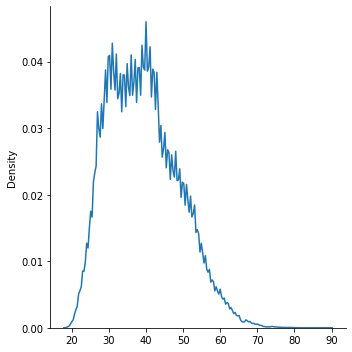

In [31]:
import seaborn as sns
sns.displot(age,kind='kde')

C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

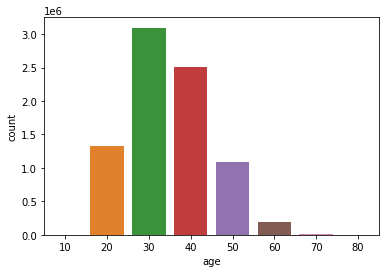

In [32]:
sns.countplot(dat['age'])

In [14]:
pd.crosstab(dat['age'],dat['is_applied'])

is_applied,0.0,1.0
age,,
10,884,255
20,1203536,96485
30,2889172,144148
40,2337297,125091
50,1013176,53568
60,172949,13432
70,12202,1609
80,272,100


### 입사년월 데이터를 이용하여 근무일 수 데이터 추출.

In [51]:
company_enter_month=dat['company_enter_month'].astype('str').str[0:6]+'01'
# 어떤 데이터들은 일수까지 적혀있는 데이터가 있어, 날짜 데이터의 길이나 형식이 일정하지 않았다.
# 따라서, 먼저 월까지 데이터를 자른 뒤, 그 뒤에 01을 더해 입사 연,월,일 데이터를 생성하였다.

In [52]:
dat['company_enter_month']=pd.to_datetime(company_enter_month)
# 그 뒤, 날짜형식으로 변경

In [34]:
dat.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,3.0,76000000.0,2022-04-20 01:23:10,42,216,3000000.0,14.5,0.0,1,40
1,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,3.0,76000000.0,2022-04-20 01:23:09,13,123,1000000.0,19.9,0.0,1,40
2,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,40000000.0,EARNEDINCOME,2019-08-01,정규직,...,2.0,64000000.0,2022-04-20 16:13:09,2,126,30000000.0,17.9,1.0,1,40
3,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2.0,28000000.0,2022-04-24 16:37:59,19,127,9000000.0,9.4,0.0,1,20
4,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2.0,28000000.0,2022-04-24 16:37:53,17,19,10000000.0,13.8,0.0,1,20


In [53]:
dat['work_time']=(dat['insert_time']-dat['company_enter_month']).dt.days
# 대출신청날짜에서 입사날짜를 빼, 근무일수 컬럼을 새로 생성.

### 근무일 수 데이터 정리

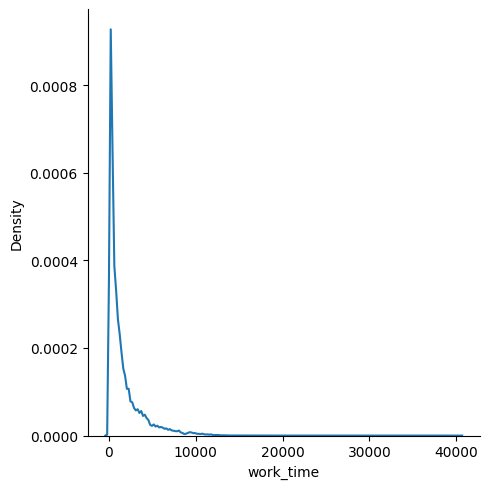

In [64]:
sns.displot(dat['work_time'],kind='kde')

In [ ]:
# 30000일...까지는 장수한다면 가능하다고 할 수도 있을 수도 있겠지만.. 40000일은 누가봐도 명백한 이상치이다. (사람이라면...)
# 근무 일수에 대한 이상치 처리가 필요할 것으로 보인다.

In [68]:
dat[dat['work_time']>20000]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,age,work_time
2252437,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:55:03,8,31,47000000.0,5.2,0.0,40,39253
2252438,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:54:43,55,12,29000000.0,10.3,0.0,40,39253
2252439,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:54:43,29,265,33000000.0,5.8,0.0,40,39253
2252440,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:54:43,50,142,44000000.0,11.2,0.0,40,39253
2252441,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:54:43,10,149,29000000.0,12.4,0.0,40,39253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093053,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:29,4,268,84000000.0,3.7,0.0,50,36522
9093054,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:29,46,227,150000000.0,10.7,0.0,50,36522
9093055,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:41,27,176,70000000.0,11.9,0.0,50,36522
9093056,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:40,52,187,3000000.0,6.2,0.0,50,36522


In [70]:
# 이상한 데이터들의 원인을 살펴보니, 생년보다 입사한 날짜가 빠른, 이상하게 기입된 데이터들 때문으로 보인다.
# 따라서 이러한 데이터들을 삭제하고자 한다.

1943.0

In [75]:
dat[dat['company_enter_month'].dt.year<dat['birth_year']]
# 입사년도가 생년보다 빠르게 기입되어 있는, 잘못 기입되어 있는 데이터들이 궁금하여 살펴보았다.

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,age,work_time
212085,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:16,55,25,18000000.0,13.1,0.0,20,17190
212086,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:15,19,231,50000000.0,14.3,0.0,20,17190
212087,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:36,34,215,8000000.0,15.9,0.0,20,17190
212088,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:16,42,216,10000000.0,14.3,0.0,20,17190
212089,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:16,32,56,15000000.0,15.8,0.0,20,17190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093053,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:29,4,268,84000000.0,3.7,0.0,50,36522
9093054,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:29,46,227,150000000.0,10.7,0.0,50,36522
9093055,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:41,27,176,70000000.0,11.9,0.0,50,36522
9093056,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:40,52,187,3000000.0,6.2,0.0,50,36522


In [ ]:
# 데이터 기입좀 제대로 좀.. 태어나기 전부터 입사가 결정된건가..

In [54]:
dat=dat[dat['company_enter_month'].dt.year>dat['birth_year']]
# 이상한 데이터를 제거하였다.

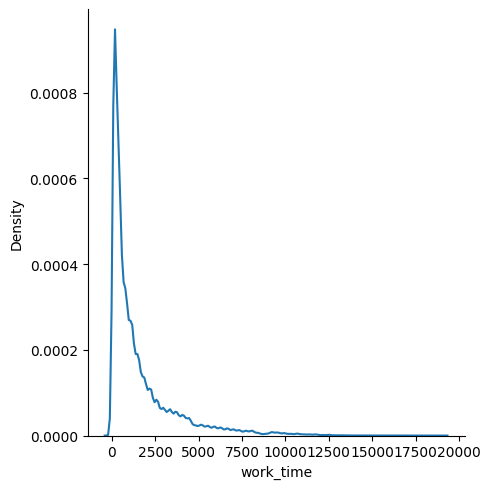

In [81]:
sns.displot(dat['work_time'],kind='kde')

In [ ]:
# 한가지 또 이상한 점을 발견하였는데, work_time,즉 근무일 수가 음수인 경우이다.
# 이 뜻은 입사년도가 대출일시보다 늦었다는 뜻인데, 대출신청당시에 미래에 입사가 확정되어 있는 경우라고 볼 수도 있겠지만,
# 주관적인 판단은 분석에 영향을 미쳐서는 안된다고 생각하기에, 안전하게 이러한 데이터들도 삭제하기로 결정하였다.

In [55]:
dat=dat[dat['work_time']>0]
# 근무시간이 음수인 이상한 데이터들을 삭제하였다.

In [82]:
dat[dat['work_time']>17500]
# 호기심삼아 근무시간이 매우 큰 데이터들을 살펴보았다.

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,age,work_time
1209495,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:39:10,29,20,40000000.0,8.4,1.0,60,18685
1209496,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:38:52,42,258,3000000.0,12.9,0.0,60,18685
1209497,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:38:53,44,8,3000000.0,14.6,0.0,60,18685
1209498,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:38:52,57,71,3000000.0,12.9,0.0,60,18685
1209499,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:38:52,19,231,20000000.0,15.0,0.0,60,18685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626468,824588,636824,1961.0,1.0,2022-03-30 23:36:05,650.0,40000000.0,EARNEDINCOME2,1970-03-01,일용직,...,0.0,0.0,2022-03-30 23:36:06,29,265,40000000.0,6.8,0.0,60,19022
8626469,824588,636824,1961.0,1.0,2022-03-30 23:36:05,650.0,40000000.0,EARNEDINCOME2,1970-03-01,일용직,...,0.0,0.0,2022-03-30 23:36:06,52,234,36000000.0,5.0,0.0,60,19022
8626470,824588,636824,1961.0,1.0,2022-03-30 23:36:05,650.0,40000000.0,EARNEDINCOME2,1970-03-01,일용직,...,0.0,0.0,2022-03-30 23:36:06,36,60,20000000.0,13.4,0.0,60,19022
8626471,824588,636824,1961.0,1.0,2022-03-30 23:36:05,650.0,40000000.0,EARNEDINCOME2,1970-03-01,일용직,...,0.0,0.0,2022-03-30 23:36:06,42,216,10000000.0,10.5,0.0,60,19022


In [ ]:
# 61년생이 70년에 10살 때 입사해서 지금까지 평생 일을 해 오신.. 현대에서 보면 이상하다고 생각 되는 데이터이지만 당시 시대 상황상
# 그랬을 수도 있으니 그대로 두기로 한다.

In [18]:
dat['work_time'] = dat['work_time']/365
# 근무일수의 단위를 연으로 바꿈.

In [19]:
dat['work_time']

0          0.550685
1          0.550685
2          2.720548
3          0.980822
4          0.980822
             ...   
8064171    4.673973
8064172    4.673973
8064173    4.673973
8064174    1.246575
8064175    1.246575
Name: work_time, Length: 8064176, dtype: float64

### 재직기간에 따른 분류

In [ ]:
# 은행사에서 알아보니, 재직기간에 따라서 상품의 개수가 달라진다고 함.
# 보통 재직 1개월 이내, 6개월 이내, 12개월(1년) 이상인 사람들의 상품이 다르다고 함. 따라서 이 기준을 바탕으로 분류.

In [20]:
bins = [0,1/12,0.5,1,100]

In [21]:
labels = [0,1,2,3]

In [22]:
dat['work_rank']=pd.cut(dat['work_time'],bins,right=False,labels=labels)

In [23]:
pd.crosstab(dat['work_rank'],dat['is_applied'])[1]/pd.crosstab(dat['work_rank'],dat['is_applied'])[0]

work_rank
0    0.124340
1    0.088748
2    0.053307
3    0.050107
dtype: float64

<AxesSubplot:xlabel='work_rank', ylabel='loan_rate'>

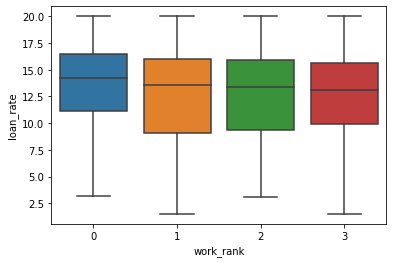

In [25]:
import seaborn as sns
sns.boxplot(x='work_rank',y='loan_rate',data=dat)

<AxesSubplot:xlabel='loan_limit', ylabel='work_rank'>

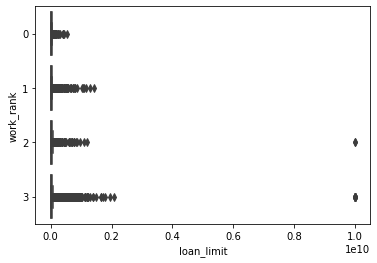

In [26]:
sns.boxplot(x='loan_limit',y='work_rank',data=dat)

### 기대출 금액, 기대출 개수 처리 아이디어

In [ ]:
# 보통, 연간수입보다 기대출 금액이 2배 이상인 경우를 기대출 과다자 라고 부름.
# 따라서, 기대출이 전혀 없는 사람, 기대출이 있지만 소액인 사람, 기대출 과다인 사람으로 3가지로 분류하고자 함.

In [16]:
dat['exloan']=0

In [17]:
dat.loc[dat['existing_loan_cnt']>0,'exloan']=1

In [18]:
dat.loc[dat['existing_loan_amt']>2*dat['yearly_income'],'exloan']=2

In [19]:
ex=pd.crosstab(dat['exloan'],dat['is_applied'])

In [20]:
ex[1]/ex[0]
# 기대출 과다자, 기대출이 있는 사람의 대출 신청 비율이 기대출이 없는 사람보다도 더 높다.

exloan
0    0.043357
1    0.059791
2    0.058502
dtype: float64

<AxesSubplot:xlabel='exloan', ylabel='loan_rate'>

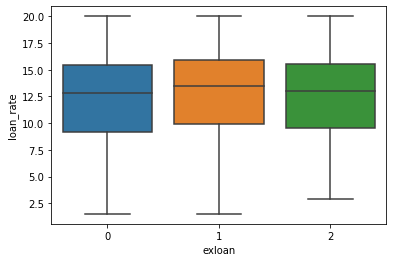

In [22]:
import seaborn as sns
sns.boxplot(x='exloan',y='loan_rate',data=dat)

In [27]:
dat

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,2022-04-20 01:23:10,42,216,3000000.0,14.5,0.0,1,40,0.550685,2
1,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,2022-04-20 01:23:09,13,123,1000000.0,19.9,0.0,1,40,0.550685,2
2,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,40000000.0,EARNEDINCOME,2019-08-01,정규직,...,2022-04-20 16:13:09,2,126,30000000.0,17.9,1.0,1,40,2.720548,3
3,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2022-04-24 16:37:59,19,127,9000000.0,9.4,0.0,1,20,0.980822,2
4,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2022-04-24 16:37:53,17,19,10000000.0,13.8,0.0,1,20,0.980822,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064171,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,2017-08-01,정규직,...,2022-04-03 18:58:33,7,220,7000000.0,14.5,0.0,0,30,4.673973,3
8064172,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,2017-08-01,정규직,...,2022-04-03 18:58:33,21,196,3000000.0,13.0,1.0,0,30,4.673973,3
8064173,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,2017-08-01,정규직,...,2022-04-03 18:58:33,56,5,6000000.0,15.9,0.0,0,30,4.673973,3
8064174,179711,866226,1967.0,1.0,2022-04-01 10:50:50,500.0,36000000.0,EARNEDINCOME,2021-01-01,정규직,...,2022-04-01 10:50:52,49,39,8000000.0,16.1,0.0,0,50,1.246575,3


In [28]:
dat.to_csv("dat.csv",index=False)

# 현재까지 한 전처리들은 여기서 끝.

In [1]:
import pandas as pd
dat=pd.read_csv("C:\\Users\\jihun\\Downloads\\dat.csv")

## 데이터의 이상치 처리

## 아직 이상치 처리를 어떻게 해야할지 모르겠어서 교수님께 여쭤보기로...

### 금액 관련 이상치 처리

In [ ]:
# 연봉이나 대출 금액 등, 이러한 돈과 관련된 부분들은 밑으로는 0원이 끝이지만, 위로는 한계가 없어 분포가 일부의 큰 값들로 인하여
# 심하게 왜곡되어 나타날 가능성이 높다. 따라서 매우 큰 값들에 대해서는 이상치를 판별하는 기준인 q3+1.5*iqr 값을 대입하기로 하였다.

#### 연간 수입 이상치 처리

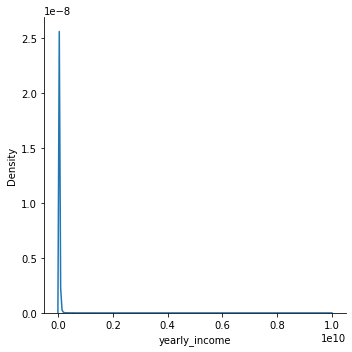

In [4]:
import seaborn as sns
sns.displot(dat,x='yearly_income',kind='kde')

In [ ]:
# 연간 수입에서의 분포를 보면, 매우 높은 연간 수입을 가지는 데이터로 인하여 분석에 지장이 있을 것으로 보인다.
# 따라서, q3+1.5*iqr 보다 큰 값을 가지는 이상치들을 전부 q3+1.5*iqr 값으로 바꾸고자 한다.

In [ ]:
#logtransformation

In [102]:
q1 = dat['yearly_income'].quantile(0.25)
q3 = dat['yearly_income'].quantile(0.75)
iqr = q3 - q1
print(q1-1.5*iqr)
print(q3+1.5*iqr)
# 연간 수입이 낮은쪽의 이상치는 없고, 연간 수입이 8000만원 이상인 사람들의 연간 수입만 8000만원으로 바꿔주기로 결정.

0.0
80000000.0


In [103]:
dat.loc[dat['yearly_income']>q3+1.5*iqr,'yearly_income'] = (q3+1.5*iqr)
# 연간 수입 이상치 처리.

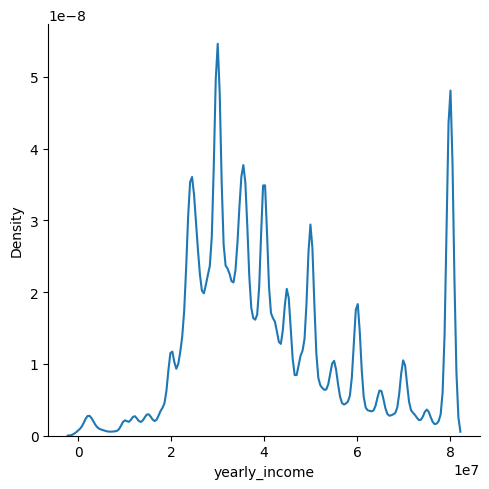

In [413]:
sns.displot(dat,x='yearly_income',kind='kde')

#### 대출 희망 금액 이상치 처리

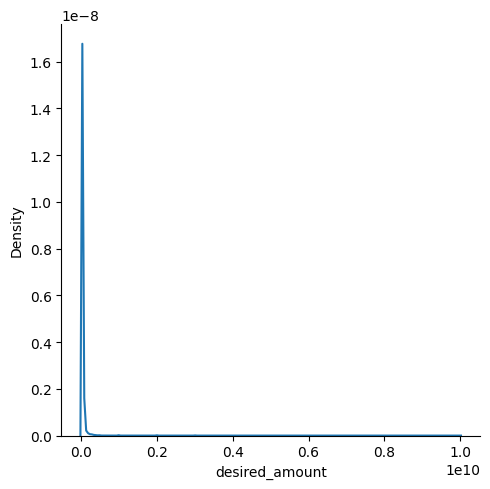

In [10]:
sns.displot(dat,x='desired_amount',kind='kde')

In [ ]:
# 연간 수입과 마찬가지로, 값이 매우 큰 이상치들로 인하여 분석에 지장이 있을 것으로 보인다.
# 따라서, 동일한 방법으로 대체하기로 결정.

In [104]:
q1 = dat['desired_amount'].quantile(0.25)
q3 = dat['desired_amount'].quantile(0.75)
iqr = q3 - q1
print(q1-1.5*iqr)
print(q3+1.5*iqr)
# 대출희망금액이 낮은쪽의 이상치는 없고, 대출희망금액이 1.1억원 이상인 사람들의 희망금액만 1.1억원으로 바꿔주기로 결정.

-50000000.0
110000000.0


In [105]:
dat.loc[dat['desired_amount']>q3+1.5*iqr,'desired_amount'] = (q3+1.5*iqr)
# 대출 희망 금액 이상치 처리.

#### 대출 한도 금액 이상치 처리

In [106]:
q1 = dat['loan_limit'].quantile(0.25)
q3 = dat['loan_limit'].quantile(0.75)
iqr = q3 - q1
print(q1-1.5*iqr)
print(q3+1.5*iqr)

-27000000.0
69000000.0


In [107]:
dat.loc[dat['loan_limit']>q3+1.5*iqr,'loan_limit'] = (q3+1.5*iqr)

## EDA (아직 참고용)

In [87]:
dat.loc[:,['credit_score','existing_loan_cnt']].corr()

,credit_score,existing_loan_cnt
credit_score,1.000000,-0.229724
existing_loan_cnt,-0.229724,1.000000


In [89]:
dat.loc[:,['credit_score','loan_limit']].corr()

,credit_score,loan_limit
credit_score,1.000000,0.250904
loan_limit,0.250904,1.000000


In [94]:
corr=dat_d.corr()

<AxesSubplot:>

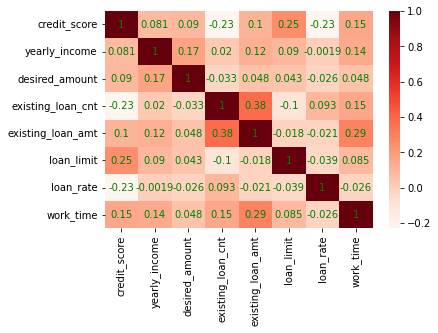

In [99]:
sns.heatmap(corr,annot=True,annot_kws=dict(color='g'),cmap='Reds')

In [92]:
dat_d=dat.drop(columns=['application_id','user_id','birth_year','insert_time','company_enter_month','personal_rehabilitation_yn',
                 'bank_id','product_id','loanapply_insert_time','gender','personal_rehabilitation_complete_yn','is_applied','exloan'])

<AxesSubplot:xlabel='is_applied', ylabel='credit_score'>

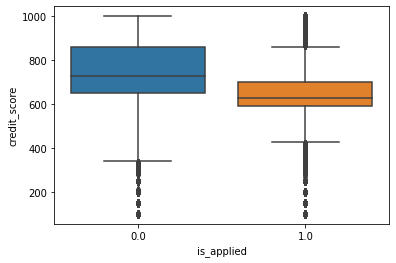

In [83]:
sns.boxplot(x='is_applied',y='credit_score',data=dat)

<AxesSubplot:xlabel='is_applied', ylabel='yearly_income'>

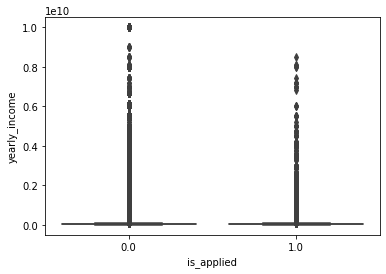

In [100]:
sns.boxplot(x='is_applied',y='yearly_income',data=dat)

<AxesSubplot:xlabel='is_applied', ylabel='desired_amount'>

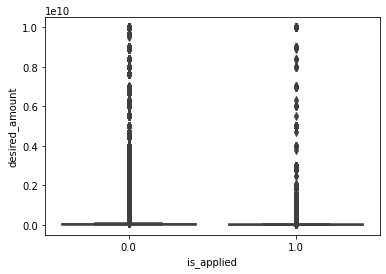

In [101]:
sns.boxplot(x='is_applied',y='desired_amount',data=dat)

In [103]:
dat['purpose'].unique()

array(['대환대출', '생활비', '자동차구입', '사업자금', '전월세보증금', '투자', '기타', '주택구입',
       'LIVING', 'SWITCHLOAN', 'INVEST', 'ETC', 'BUSINESS', 'BUYCAR',
       'HOUSEDEPOSIT', 'BUYHOUSE'], dtype=object)

<AxesSubplot:xlabel='purpose', ylabel='desired_amount'>

C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) mi

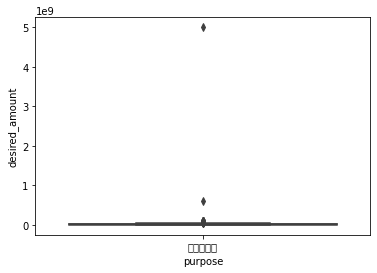

In [109]:
sns.boxplot(x='purpose',y='desired_amount',data=dat[(dat['purpose']=='자동차구입') & (dat['is_applied']==1)])

In [134]:
temp = dat[dat['yearly_income']<100000000]

<AxesSubplot:xlabel='purpose', ylabel='desired_amount'>

C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


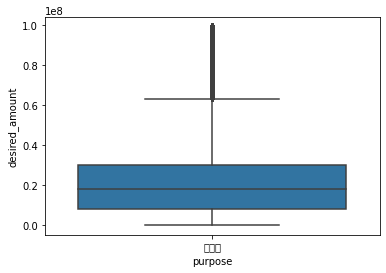

In [120]:
sns.boxplot(x='purpose',y='desired_amount',data=temp[temp['purpose']=='생활비'])

In [122]:
t=dat[(dat['purpose']=='생활비')&(dat['desired_amount']>100000000)]

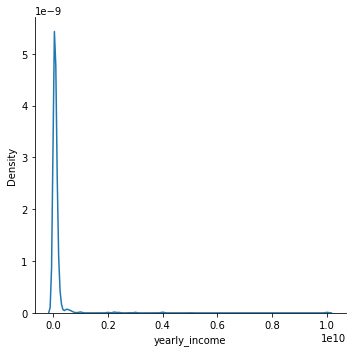

In [126]:
sns.displot(t,x='yearly_income',kind='kde')

In [127]:
t['yearly_income'].describe()

count    5.381400e+04
mean     1.280623e+08
std      4.728673e+08
min      0.000000e+00
25%      3.800000e+07
50%      6.400000e+07
75%      1.047500e+08
max      1.000000e+10
Name: yearly_income, dtype: float64

In [129]:
dat[dat['yearly_income']==10000000000]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time
1543228,1314852,580362,1992.0,1.0,2022-04-30 22:41:59,810.0,1.000000e+10,FREELANCER,2010-01-01,기타,...,20000000.0,2022-04-30 22:42:00,14,197,5000000.0,17.2,0.0,1,30,4502
1543229,1314852,580362,1992.0,1.0,2022-04-30 22:41:59,810.0,1.000000e+10,FREELANCER,2010-01-01,기타,...,20000000.0,2022-04-30 22:42:00,13,123,9000000.0,17.5,0.0,1,30,4502
1543230,1314852,580362,1992.0,1.0,2022-04-30 22:41:59,810.0,1.000000e+10,FREELANCER,2010-01-01,기타,...,20000000.0,2022-04-30 22:42:00,6,36,40000000.0,17.7,0.0,1,30,4502
2580177,133864,580362,1992.0,1.0,2022-05-14 01:37:36,810.0,1.000000e+10,FREELANCER,2014-01-01,기타,...,20000000.0,2022-05-14 01:37:37,14,197,5000000.0,17.2,0.0,1,30,3055
2580178,133864,580362,1992.0,1.0,2022-05-14 01:37:36,810.0,1.000000e+10,FREELANCER,2014-01-01,기타,...,20000000.0,2022-05-14 01:37:36,13,123,6000000.0,17.5,0.0,1,30,3055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7498871,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-29 18:04:42,58,175,10000000.0,7.8,0.0,0,40,5019
7498872,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-29 18:04:40,59,150,50000000.0,12.8,0.0,0,40,5019
7498873,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-29 18:04:40,38,223,50000000.0,5.8,0.0,0,40,5019
7498874,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-29 18:04:41,1,61,25000000.0,12.9,0.0,0,40,5019


In [131]:
dat[dat['user_id']==169742]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time
7357969,277856,169742,1981.0,0.0,2022-03-30 11:07:59,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-30 11:08:00,29,265,90000000.0,5.2,0.0,0,40,5020
7357970,277856,169742,1981.0,0.0,2022-03-30 11:07:59,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-30 11:08:01,36,60,100000000.0,5.9,0.0,0,40,5020
7357971,277856,169742,1981.0,0.0,2022-03-30 11:07:59,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-30 11:07:59,10,65,70000000.0,12.1,0.0,0,40,5020
7357972,277856,169742,1981.0,0.0,2022-03-30 11:07:59,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-30 11:08:05,62,200,50000000.0,6.9,0.0,0,40,5020
7357973,277856,169742,1981.0,0.0,2022-03-30 11:07:59,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-30 11:07:59,30,121,90000000.0,11.8,0.0,0,40,5020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7498871,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-29 18:04:42,58,175,10000000.0,7.8,0.0,0,40,5019
7498872,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-29 18:04:40,59,150,50000000.0,12.8,0.0,0,40,5019
7498873,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-29 18:04:40,38,223,50000000.0,5.8,0.0,0,40,5019
7498874,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,2008-07-01,정규직,...,0.0,2022-03-29 18:04:41,1,61,25000000.0,12.9,0.0,0,40,5019


In [132]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8222227 entries, 0 to 8227295
Data columns (total 26 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   application_id                       int64         
 1   user_id                              int64         
 2   birth_year                           float64       
 3   gender                               float64       
 4   insert_time                          datetime64[ns]
 5   credit_score                         float64       
 6   yearly_income                        float64       
 7   income_type                          object        
 8   company_enter_month                  datetime64[ns]
 9   employment_type                      object        
 10  houseown_type                        object        
 11  desired_amount                       float64       
 12  purpose                              object        
 13  personal_rehabilitation_yn 

In [123]:
from pandasql import *
q = "SELECT DISTINCT user_id FROM t "
k=sqldf(q,locals())


In [124]:
len(k)

1547

In [136]:
temp['employment_type']=temp['employment_type'].replace({'정규직':1,'계약직':2,'일용직':3,'기타':4}).astype('category')

C:\Users\jihun\AppData\Local\Temp\ipykernel_10244\3081814251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['employment_type']=temp['employment_type'].replace({'정규직':1,'계약직':2,'일용직':3,'기타':4}).astype('category')


<AxesSubplot:xlabel='employment_type', ylabel='yearly_income'>

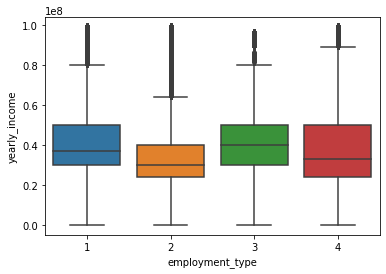

In [137]:
sns.boxplot(x='employment_type',y='yearly_income',data=temp)

In [140]:
len(dat[dat['personal_rehabilitation_complete_yn']==1]['user_id'].unique())

156

In [141]:
len(dat['user_id'].unique())

180536

In [145]:
dat[(dat['personal_rehabilitation_complete_yn']==1) & (dat['is_applied']==1)]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time
1357,815168,675357,1975.0,0.0,2022-05-06 12:46:58,620.0,24000000.0,EARNEDINCOME2,2021-07-01,정규직,...,33000000.0,2022-05-06 12:47:01,4,268,23000000.0,13.1,1.0,1,40,309
1703,1157577,283815,1989.0,1.0,2022-05-31 12:01:58,550.0,50000000.0,EARNEDINCOME,2018-01-01,정규직,...,10000000.0,2022-05-31 12:02:10,49,39,20000000.0,16.3,1.0,1,30,1611
3974,2003648,613365,1993.0,1.0,2022-04-25 07:50:56,590.0,35000000.0,EARNEDINCOME2,2021-07-01,정규직,...,17000000.0,2022-04-25 07:50:57,59,251,11000000.0,6.6,1.0,1,20,298
3975,2003648,613365,1993.0,1.0,2022-04-25 07:50:56,590.0,35000000.0,EARNEDINCOME2,2021-07-01,정규직,...,17000000.0,2022-04-25 07:51:11,22,164,11000000.0,8.0,1.0,1,20,298
3976,2003648,613365,1993.0,1.0,2022-04-25 07:50:56,590.0,35000000.0,EARNEDINCOME2,2021-07-01,정규직,...,17000000.0,2022-04-25 07:50:57,40,261,11000000.0,7.4,1.0,1,20,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220022,1222215,314543,1984.0,1.0,2022-03-24 13:48:34,630.0,50000000.0,FREELANCER,2020-09-01,기타,...,0.0,2022-03-24 13:48:36,6,36,40000000.0,15.4,1.0,0,30,569
7220023,1222215,314543,1984.0,1.0,2022-03-24 13:48:34,630.0,50000000.0,FREELANCER,2020-09-01,기타,...,0.0,2022-03-24 13:48:37,21,196,3000000.0,12.9,1.0,0,30,569
7220039,1816826,710929,1984.0,1.0,2022-03-14 18:31:48,980.0,200000000.0,EARNEDINCOME,2015-03-01,정규직,...,0.0,2022-03-14 18:31:50,22,221,30000000.0,14.7,1.0,0,30,2570
7220194,775324,710929,1984.0,1.0,2022-03-18 14:12:58,980.0,200000000.0,EARNEDINCOME,2015-03-01,정규직,...,0.0,2022-03-18 14:13:11,11,170,69000000.0,12.3,1.0,0,30,2574


<AxesSubplot:xlabel='bank_id', ylabel='loan_rate'>

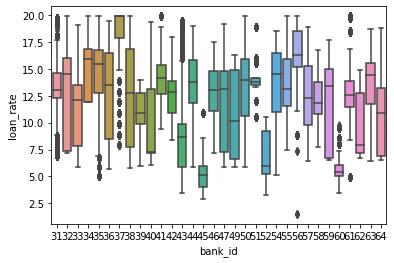

In [164]:
sns.boxplot(x='bank_id',y='loan_rate',data=dat[dat['bank_id']>30])

In [165]:
dat[(dat['bank_id']==37) & (dat['is_applied']==1)]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time
2651,2140921,537420,1988.0,1.0,2022-05-23 11:02:22,540.0,33000000.0,EARNEDINCOME,2020-06-01,정규직,...,68000000.0,2022-05-23 11:02:25,37,206,8000000.0,19.9,1.0,2,30,721
2693,121504,3961,1984.0,1.0,2022-05-23 10:04:28,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-23 10:04:30,37,206,20000000.0,19.9,1.0,1,30,1572
2768,1592741,521218,1990.0,1.0,2022-05-25 14:50:25,620.0,35000000.0,EARNEDINCOME,2021-11-01,정규직,...,22000000.0,2022-05-25 14:50:27,37,206,7000000.0,19.9,1.0,1,30,205
2776,1592741,521218,1990.0,1.0,2022-05-25 14:50:25,620.0,35000000.0,EARNEDINCOME,2021-11-01,정규직,...,22000000.0,2022-05-25 14:50:27,37,206,7000000.0,19.9,1.0,1,30,205
3047,1496971,654875,1990.0,1.0,2022-04-25 09:02:43,540.0,31000000.0,EARNEDINCOME,2021-09-01,정규직,...,32000000.0,2022-04-25 09:02:45,37,206,5000000.0,19.9,1.0,1,30,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216936,1509978,194031,1991.0,0.0,2022-03-28 22:01:03,560.0,55000000.0,EARNEDINCOME,2022-03-01,정규직,...,0.0,2022-03-28 22:01:05,37,206,9000000.0,19.9,1.0,0,30,27
8216999,1507542,511028,1981.0,1.0,2022-05-23 09:52:17,570.0,49000000.0,EARNEDINCOME,2019-12-01,정규직,...,0.0,2022-05-23 09:52:19,37,206,3000000.0,19.9,1.0,0,40,904
8218848,826599,552659,1982.0,1.0,2022-03-02 14:16:17,580.0,60000000.0,EARNEDINCOME,2021-06-01,정규직,...,0.0,2022-03-02 14:16:19,37,206,11000000.0,19.9,1.0,0,40,274
8224722,56176,194628,1977.0,1.0,2022-04-13 17:43:09,550.0,49000000.0,EARNEDINCOME,2016-03-01,정규직,...,0.0,2022-04-13 17:43:11,37,206,9000000.0,19.9,1.0,0,40,2234


In [166]:
dat[dat['user_id']==3961]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time
2691,121504,3961,1984.0,1.0,2022-05-23 10:04:28,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-23 10:04:29,10,65,19000000.0,18.5,0.0,1,30,1572
2692,121504,3961,1984.0,1.0,2022-05-23 10:04:28,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-23 10:04:29,10,149,19000000.0,18.5,1.0,1,30,1572
2693,121504,3961,1984.0,1.0,2022-05-23 10:04:28,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-23 10:04:30,37,206,20000000.0,19.9,1.0,1,30,1572
2694,121504,3961,1984.0,1.0,2022-05-23 10:04:28,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-23 10:04:30,3,205,3000000.0,19.9,0.0,1,30,1572
7980,1673071,3961,1984.0,1.0,2022-05-17 21:14:42,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-17 21:14:43,10,149,19000000.0,18.5,0.0,1,30,1566
7981,1673071,3961,1984.0,1.0,2022-05-17 21:14:42,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-17 21:14:44,37,206,20000000.0,19.9,1.0,1,30,1566
7982,1673071,3961,1984.0,1.0,2022-05-17 21:14:42,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-17 21:14:43,10,65,19000000.0,18.5,0.0,1,30,1566
7983,1673071,3961,1984.0,1.0,2022-05-17 21:14:42,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-17 21:14:44,3,205,3000000.0,19.9,0.0,1,30,1566
238053,1620264,3961,1984.0,1.0,2022-05-27 09:49:28,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-27 09:49:28,10,65,19000000.0,18.5,1.0,1,30,1576
238054,1620264,3961,1984.0,1.0,2022-05-27 09:49:28,490.0,52000000.0,EARNEDINCOME,2018-02-01,정규직,...,44000000.0,2022-05-27 09:49:28,10,149,19000000.0,18.5,0.0,1,30,1576


In [167]:
dat[dat['credit_score']==1000]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time
5965,738369,615009,1984.0,1.0,2022-04-24 15:23:46,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-04-24 15:23:47,33,110,37000000.0,12.6,0.0,1,30,4437
5966,738369,615009,1984.0,1.0,2022-04-24 15:23:46,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-04-24 15:23:47,1,61,37000000.0,7.9,0.0,1,30,4437
5967,738369,615009,1984.0,1.0,2022-04-24 15:23:46,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-04-24 15:23:46,38,223,37000000.0,9.8,0.0,1,30,4437
5968,738369,615009,1984.0,1.0,2022-04-24 15:23:46,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-04-24 15:23:48,41,222,17000000.0,16.3,0.0,1,30,4437
5969,738369,615009,1984.0,1.0,2022-04-24 15:23:46,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-04-24 15:23:48,46,49,11000000.0,12.6,0.0,1,30,4437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226253,1315551,627669,1990.0,1.0,2022-03-02 16:32:05,1000.0,69000000.0,EARNEDINCOME,2018-12-01,정규직,...,0.0,2022-03-02 16:32:07,3,205,3000000.0,17.9,0.0,0,30,1187
8226254,1315551,627669,1990.0,1.0,2022-03-02 16:32:05,1000.0,69000000.0,EARNEDINCOME,2018-12-01,정규직,...,0.0,2022-03-02 16:32:08,22,221,30000000.0,14.7,0.0,0,30,1187
8226255,1315551,627669,1990.0,1.0,2022-03-02 16:32:05,1000.0,69000000.0,EARNEDINCOME,2018-12-01,정규직,...,0.0,2022-03-02 16:32:06,57,71,65000000.0,7.8,0.0,0,30,1187
8226256,1315551,627669,1990.0,1.0,2022-03-02 16:32:05,1000.0,69000000.0,EARNEDINCOME,2018-12-01,정규직,...,0.0,2022-03-02 16:32:07,54,235,11000000.0,9.5,0.0,0,30,1187


In [169]:
dat[(dat['user_id']==615009) & dat['is_applied']==1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time
157550,687598,615009,1984.0,1.0,2022-05-09 21:03:01,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-09 21:03:04,12,35,30000000.0,5.3,1.0,1,30,4452
157592,687598,615009,1984.0,1.0,2022-05-09 21:03:01,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-09 21:03:04,12,35,30000000.0,5.3,1.0,1,30,4452
163149,2073670,615009,1984.0,1.0,2022-05-31 15:08:18,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-31 15:08:21,9,250,15000000.0,5.6,1.0,1,30,4474
163198,2073670,615009,1984.0,1.0,2022-05-31 15:08:18,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-31 15:08:21,9,250,15000000.0,5.6,1.0,1,30,4474
562779,2110943,615009,1984.0,1.0,2022-05-06 17:55:32,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-06 17:55:35,12,35,30000000.0,5.3,1.0,1,30,4449
562821,2110943,615009,1984.0,1.0,2022-05-06 17:55:32,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-06 17:55:35,12,35,30000000.0,5.3,1.0,1,30,4449
563043,2101572,615009,1984.0,1.0,2022-05-24 11:45:02,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-24 11:45:04,54,259,70000000.0,6.5,1.0,1,30,4467
563089,2101572,615009,1984.0,1.0,2022-05-24 11:45:02,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-24 11:45:04,54,259,70000000.0,6.5,1.0,1,30,4467
796882,1230425,615009,1984.0,1.0,2022-04-13 10:46:13,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-04-13 10:46:14,54,259,60000000.0,7.0,1.0,1,30,4426
796925,1230425,615009,1984.0,1.0,2022-04-13 10:46:13,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-04-13 10:46:14,54,259,60000000.0,7.0,1.0,1,30,4426


In [170]:
df=dat.drop_duplicates()

In [172]:
df[(df['user_id']==615009) & df['is_applied']==1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time
157550,687598,615009,1984.0,1.0,2022-05-09 21:03:01,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-09 21:03:04,12,35,30000000.0,5.3,1.0,1,30,4452
163149,2073670,615009,1984.0,1.0,2022-05-31 15:08:18,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-31 15:08:21,9,250,15000000.0,5.6,1.0,1,30,4474
562779,2110943,615009,1984.0,1.0,2022-05-06 17:55:32,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-06 17:55:35,12,35,30000000.0,5.3,1.0,1,30,4449
563043,2101572,615009,1984.0,1.0,2022-05-24 11:45:02,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-05-24 11:45:04,54,259,70000000.0,6.5,1.0,1,30,4467
796882,1230425,615009,1984.0,1.0,2022-04-13 10:46:13,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-04-13 10:46:14,54,259,60000000.0,7.0,1.0,1,30,4426
797039,197815,615009,1984.0,1.0,2022-04-07 18:11:04,1000.0,45000000.0,EARNEDINCOME,2010-03-01,정규직,...,71000000.0,2022-04-07 18:11:07,54,259,60000000.0,7.0,1.0,1,30,4420


In [174]:
pd.crosstab(df['gender'],df['is_applied'])

is_applied,0.0,1.0
gender,,
0.0,2237429,136183
1.0,5392059,298505


In [177]:
df[df['gender']==1].groupby('houseown_type').size()

houseown_type
기타가족소유    1481270
배우자          2940
자가        1727436
전월세       2478918
dtype: int64

In [178]:
df['income_type'].unique()

array(['EARNEDINCOME2', 'EARNEDINCOME', 'PRACTITIONER', 'PRIVATEBUSINESS',
       'FREELANCER', 'OTHERINCOME'], dtype=object)

In [179]:
df.groupby('existing_loan_cnt').size()

existing_loan_cnt
0.0      1166103
1.0      1145309
2.0      1335343
3.0      1270370
4.0       966811
          ...   
117.0         23
128.0          6
156.0         55
157.0         29
178.0         69
Length: 83, dtype: int64

In [181]:
df['existing_loan_cnt'].describe()

count    8.064176e+06
mean     3.396558e+00
std      3.256333e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      1.780000e+02
Name: existing_loan_cnt, dtype: float64

In [188]:
df[(df['existing_loan_cnt']>5)].count()

application_id                         1480209
user_id                                1480209
birth_year                             1480209
gender                                 1480209
insert_time                            1480209
credit_score                           1480209
yearly_income                          1480209
income_type                            1480209
company_enter_month                    1480209
employment_type                        1480209
houseown_type                          1480209
desired_amount                         1480209
purpose                                1480209
personal_rehabilitation_yn             1480209
personal_rehabilitation_complete_yn    1480209
existing_loan_cnt                      1480209
existing_loan_amt                      1480209
loanapply_insert_time                  1480209
bank_id                                1480209
product_id                             1480209
loan_limit                             1480209
loan_rate    

In [180]:
df[df['existing_loan_cnt']==178]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time
1682130,1443908,174846,1956.0,1.0,2022-03-19 08:37:58,650.0,42000000.0,EARNEDINCOME,2016-09-01,계약직,...,229000000.0,2022-03-19 08:37:58,38,134,8000000.0,7.2,1.0,2,60,2025
1682131,1443908,174846,1956.0,1.0,2022-03-19 08:37:58,650.0,42000000.0,EARNEDINCOME,2016-09-01,계약직,...,229000000.0,2022-03-19 08:37:59,33,189,8000000.0,7.8,1.0,2,60,2025
1682132,1443908,174846,1956.0,1.0,2022-03-19 08:37:58,650.0,42000000.0,EARNEDINCOME,2016-09-01,계약직,...,229000000.0,2022-03-19 08:37:59,62,48,8000000.0,7.2,1.0,2,60,2025
1682133,1443908,174846,1956.0,1.0,2022-03-19 08:37:58,650.0,42000000.0,EARNEDINCOME,2016-09-01,계약직,...,229000000.0,2022-03-19 08:37:59,27,148,8000000.0,7.3,0.0,2,60,2025
1682134,1443908,174846,1956.0,1.0,2022-03-19 08:37:58,650.0,42000000.0,EARNEDINCOME,2016-09-01,계약직,...,229000000.0,2022-03-19 08:38:00,36,103,8000000.0,8.9,0.0,2,60,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541170,385750,174846,1956.0,1.0,2022-03-18 01:08:03,650.0,20000000.0,EARNEDINCOME,2016-09-01,계약직,...,229000000.0,2022-03-18 01:08:04,47,47,7000000.0,9.0,1.0,2,60,2024
4541171,385750,174846,1956.0,1.0,2022-03-18 01:08:03,650.0,20000000.0,EARNEDINCOME,2016-09-01,계약직,...,229000000.0,2022-03-18 01:08:04,27,148,7000000.0,7.3,1.0,2,60,2024
4541172,385750,174846,1956.0,1.0,2022-03-18 01:08:03,650.0,20000000.0,EARNEDINCOME,2016-09-01,계약직,...,229000000.0,2022-03-18 01:08:04,59,251,9000000.0,6.7,1.0,2,60,2024
4541173,385750,174846,1956.0,1.0,2022-03-18 01:08:03,650.0,20000000.0,EARNEDINCOME,2016-09-01,계약직,...,229000000.0,2022-03-18 01:08:04,38,134,7000000.0,7.2,0.0,2,60,2024


In [189]:
df.to_csv("df.csv",index=False)

# 불필요해 보이는 데이터 컬럼 처리.

In [57]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9213115 entries, 0 to 9214515
Data columns (total 27 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   application_id                       int64         
 1   user_id                              int64         
 2   birth_year                           float64       
 3   gender                               float64       
 4   insert_time                          datetime64[ns]
 5   credit_score                         float64       
 6   yearly_income                        float64       
 7   income_type                          object        
 8   company_enter_month                  datetime64[ns]
 9   employment_type                      object        
 10  houseown_type                        object        
 11  desired_amount                       float64       
 12  purpose                              object        
 13  personal_rehabilitation_yn 

In [115]:
dat_d=dat.drop(columns=['application_id','user_id','birth_year','insert_time','company_enter_month','personal_rehabilitation_yn',
                 'bank_id','product_id','existing_loan_cnt','existing_loan_amt','loanapply_insert_time'])

In [116]:
dat_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9199725 entries, 0 to 9214515
Data columns (total 16 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   gender                               float64 
 1   credit_score                         float64 
 2   yearly_income                        float64 
 3   income_type                          object  
 4   employment_type                      object  
 5   houseown_type                        object  
 6   desired_amount                       float64 
 7   purpose                              object  
 8   personal_rehabilitation_complete_yn  float64 
 9   loan_limit                           float64 
 10  loan_rate                            float64 
 11  is_applied                           float64 
 12  exloan                               int64   
 13  age                                  category
 14  work_time                            float64 
 15  work_rank      

In [117]:
dat_d.corr()

,gender,credit_score,yearly_income,desired_amount,personal_rehabilitation_complete_yn,loan_limit,loan_rate,is_applied,exloan,work_time
gender,1.000000,0.076381,0.293662,0.093436,-0.001375,0.083710,0.013639,-0.009017,0.039797,0.081000
credit_score,0.076381,1.000000,0.236227,0.283123,-0.009774,0.275173,-0.197117,-0.156933,0.043383,0.135984
yearly_income,0.293662,0.236227,1.000000,0.362395,-0.010318,0.287984,0.004480,-0.039386,0.005615,0.449875
desired_amount,0.093436,0.283123,0.362395,1.000000,-0.011920,0.196674,-0.092293,-0.110802,-0.039017,0.169950
personal_rehabilitation_complete_yn,-0.001375,-0.009774,-0.010318,-0.011920,1.000000,-0.001484,-0.002793,0.002669,0.000783,-0.004374
loan_limit,0.083710,0.275173,0.287984,0.196674,-0.001484,1.000000,-0.045661,-0.035448,-0.128478,0.104076
loan_rate,0.013639,-0.197117,0.004480,-0.092293,-0.002793,-0.045661,1.000000,-0.060488,0.037226,-0.030385
is_applied,-0.009017,-0.156933,-0.039386,-0.110802,0.002669,-0.035448,-0.060488,1.000000,0.025384,-0.026328
exloan,0.039797,0.043383,0.005615,-0.039017,0.000783,-0.128478,0.037226,0.025384,1.000000,0.088386
work_time,0.081000,0.135984,0.449875,0.169950,-0.004374,0.104076,-0.030385,-0.026328,0.088386,1.000000


In [118]:
import os
os.chdir("C:\\Users\\jihun\\Downloads")

dat_d.to_csv("dat_modified.csv",index=False)

In [1]:
import pandas as pd
dat_d=pd.read_csv("C:\\Users\\com\\Downloads\\dat_modified.csv")

In [ ]:
#----------------------------------------------------------------------

In [2]:
dat_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199725 entries, 0 to 9199724
Data columns (total 16 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   gender                               float64
 1   credit_score                         float64
 2   yearly_income                        float64
 3   income_type                          object 
 4   employment_type                      object 
 5   houseown_type                        object 
 6   desired_amount                       float64
 7   purpose                              object 
 8   personal_rehabilitation_complete_yn  float64
 9   loan_limit                           float64
 10  loan_rate                            float64
 11  is_applied                           float64
 12  exloan                               int64  
 13  age                                  int64  
 14  work_time                            float64
 15  work_rank                       

In [7]:
import pyspark

In [10]:
myConf= pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [12]:
dat1

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


In [16]:
spark_df=spark.read.csv('C:\\Users\\jihun\\Downloads\\dat.csv',header=True,inferSchema=True)
spark_df.show()

+--------------+-------+----------+------+-------------------+------------+-------------+-------------+-------------------+---------------+-------------+--------------+--------+--------------------------+-----------------------------------+-----------------+-----------------+---------------------+-------+----------+----------+---------+----------+------+---+------------------+---------+
|application_id|user_id|birth_year|gender|        insert_time|credit_score|yearly_income|  income_type|company_enter_month|employment_type|houseown_type|desired_amount| purpose|personal_rehabilitation_yn|personal_rehabilitation_complete_yn|existing_loan_cnt|existing_loan_amt|loanapply_insert_time|bank_id|product_id|loan_limit|loan_rate|is_applied|exloan|age|         work_time|work_rank|
+--------------+-------+----------+------+-------------------+------------+-------------+-------------+-------------------+---------------+-------------+--------------+--------+--------------------------+----------------

In [19]:
spark_df.select(['credit_score','is_applied']).show()

+------------+----------+
|credit_score|is_applied|
+------------+----------+
|       670.0|       0.0|
|       670.0|       0.0|
|       540.0|       1.0|
|       710.0|       0.0|
|       710.0|       0.0|
|       710.0|       0.0|
|       710.0|       0.0|
|       710.0|       0.0|
|       710.0|       0.0|
|       710.0|       0.0|
|       680.0|       0.0|
|       680.0|       0.0|
|       680.0|       0.0|
|       680.0|       0.0|
|       680.0|       0.0|
|       680.0|       0.0|
|       680.0|       0.0|
|       680.0|       0.0|
|       680.0|       0.0|
|       680.0|       0.0|
+------------+----------+
only showing top 20 rows



In [20]:
spark_df.printSchema()

root
 |-- application_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- birth_year: double (nullable = true)
 |-- gender: double (nullable = true)
 |-- insert_time: timestamp (nullable = true)
 |-- credit_score: double (nullable = true)
 |-- yearly_income: double (nullable = true)
 |-- income_type: string (nullable = true)
 |-- company_enter_month: timestamp (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- houseown_type: string (nullable = true)
 |-- desired_amount: double (nullable = true)
 |-- purpose: string (nullable = true)
 |-- personal_rehabilitation_yn: double (nullable = true)
 |-- personal_rehabilitation_complete_yn: double (nullable = true)
 |-- existing_loan_cnt: double (nullable = true)
 |-- existing_loan_amt: double (nullable = true)
 |-- loanapply_insert_time: timestamp (nullable = true)
 |-- bank_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- loan_limit: double (nullable = true)
 |-- loan_rate: